<a href="https://colab.research.google.com/github/lollypop96/Bayesian-network-applied-to-the-Heart-Failure-data-set/blob/main/capstone_gruppo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
# Scaricare le stopwords di NLTK se non sono già presenti
nltk.download('punkt_tab')
#nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Lista di stopwords in inglese
stop_words = set(stopwords.words('english'))

In [ ]:
# Lista di colori comuni
colors = {"red", "blue", "green", "yellow", "black", "white", "gray", "grey", "purple",
          "pink", "brown", "orange", "violet", "cyan", "magenta", "beige", "maroon",
          "navy", "gold", "silver", "teal", "turquoise", "indigo", "lavender"}
gender = {"women", "woman", "men", "man", "boys", "boy", "girls", "girl", "unisex"}

In [ ]:
stop_words.update(colors)
stop_words.update(gender)

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/master_executive/capstone/Dataset - ORAFASHION"

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-dac80cd1beb7>", line 1, in <cell line: 0>
    get_ipython().run_line_magic('cd', '"/content/drive/MyDrive/master_executive/capstone/Dataset - ORAFASHION"')
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
                              ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
             ^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected

During handling of the ab

In [ ]:
dir_path=os.getcwd()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-223a09184675>", line 1, in <cell line: 0>
    dir_path=os.getcwd()
             ^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, 

In [ ]:
os.listdir(dir_path) # returns list

['capstone_project_gruppo5.ipynb',
 'DO_NOT_TOUCH',
 'old',
 'domande_incontro_12022025.txt',
 'dashboard',
 'dataset']

## Loading of the datasets

### Customers data

In [ ]:
customers_df = pd.read_excel(r"dataset/WB_Customers.xlsx", sheet_name="Customer", header=0)
customers_df.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-e2516f3896a7>", line 1, in <cell line: 0>
    customers_df = pd.read_excel(r"dataset/WB_Customers.xlsx", sheet_name="Customer", header=0)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 495, in read_excel
    io = ExcelFile(
         ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1550, in __init__
    ext = inspect_excel_format(
          ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1402, in inspect_excel_format
    with get_handle(
         ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/common.py", line 882, in get_handl

In [ ]:
customers_missing_data = pd.DataFrame({'total_missing': customers_df.isnull().sum(),
                             'perc_missing': (customers_df.isnull().sum()/1500)*100}
                            )
customers_missing_data

total_missing  perc_missing
Customer_ID              0           0.0
GENDER                   0           0.0
AGE                      0           0.0
GEOGRAPHY                0           0.0
age_group                0           0.0

Non sono presenti record mancanti in nessuna delle variabili del dataset.

In [ ]:
## duplicate rows
duplicate_rows_df = customers_df[customers_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


Non sono presenti righe duplicate nel dataset.

#### Descrizione delle variabili

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22625 entries, 0 to 22624
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Customer_ID  22625 non-null  int64   
 1   GENDER       22625 non-null  object  
 2   AGE          22625 non-null  int64   
 3   GEOGRAPHY    22625 non-null  object  
 4   age_group    22625 non-null  category
dtypes: category(1), int64(2), object(2)
memory usage: 729.6+ KB


In [ ]:
# checking unique customer ID
print('Number of unique Customer_ID in the customer_id column is', customers_df['Customer_ID'].nunique())

Number of unique Customer_ID in the customer_id column is 22625


L'utilizzo della funzione describe() con delle variabili categoriche "adeguate" restituisce i valori di count, unique, top and freq.

In [ ]:
categorical_columns = ["GENDER", "GEOGRAPHY"]

In [ ]:
customers_df[categorical_columns].describe(include='object')

GENDER GEOGRAPHY
count   22625     22625
unique      2         7
top         F   Germany
freq    12636      6590

Di seguito trasformiamo le variabili categoriche e applichiamo nuovamente la funzione describe() per vedere le differenze.

In [ ]:
customers_df['GENDER'].value_counts()

GENDER
F    12636
M     9989
Name: count, dtype: int64

In [ ]:
customers_df['GEOGRAPHY'].value_counts()

GEOGRAPHY
Germany        6590
Italy          5657
France         3942
Greece         2272
Spain          1654
Netherlands    1351
UK             1159
Name: count, dtype: int64

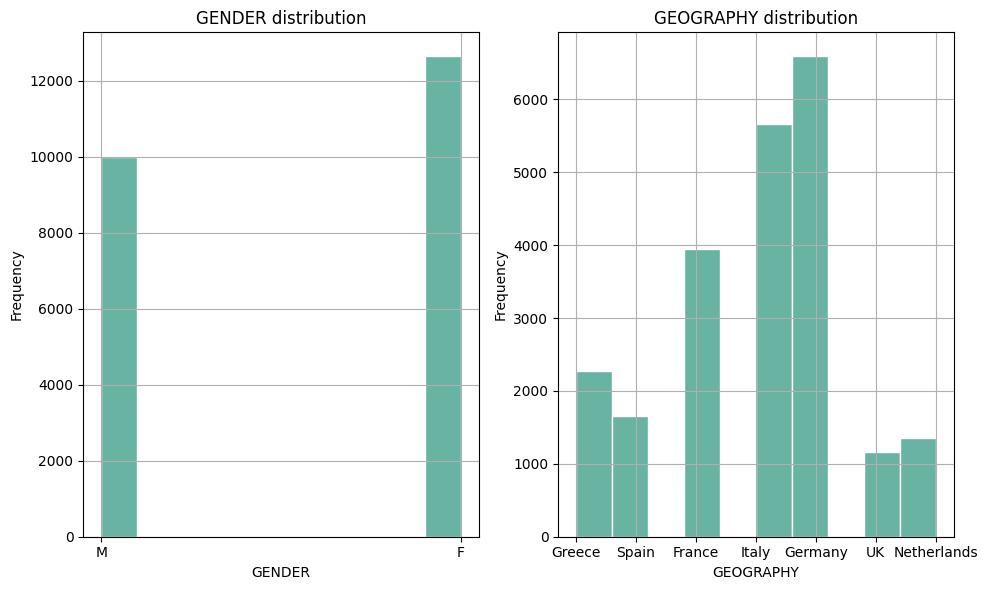

In [ ]:
# Initialize a 2x2 charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
6
# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(categorical_columns):

    # Add the histogram
    customers_df[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )

    # Add title and axis label
    axes[i].set_title(f'{column} distribution')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Da una prima analisi di distribuzione dei dati si evince:
- la distribuzione di uomini è inferiore del 25% rispetto a quello delle donne;
- la distribuzione invece dei Paesi evidenzia come quelli con il maggior numero di clienti siano Italia e Germania.

<ipython-input-54-15079dcef4dc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=customers_df, x='GEOGRAPHY', palette = 'cubehelix')


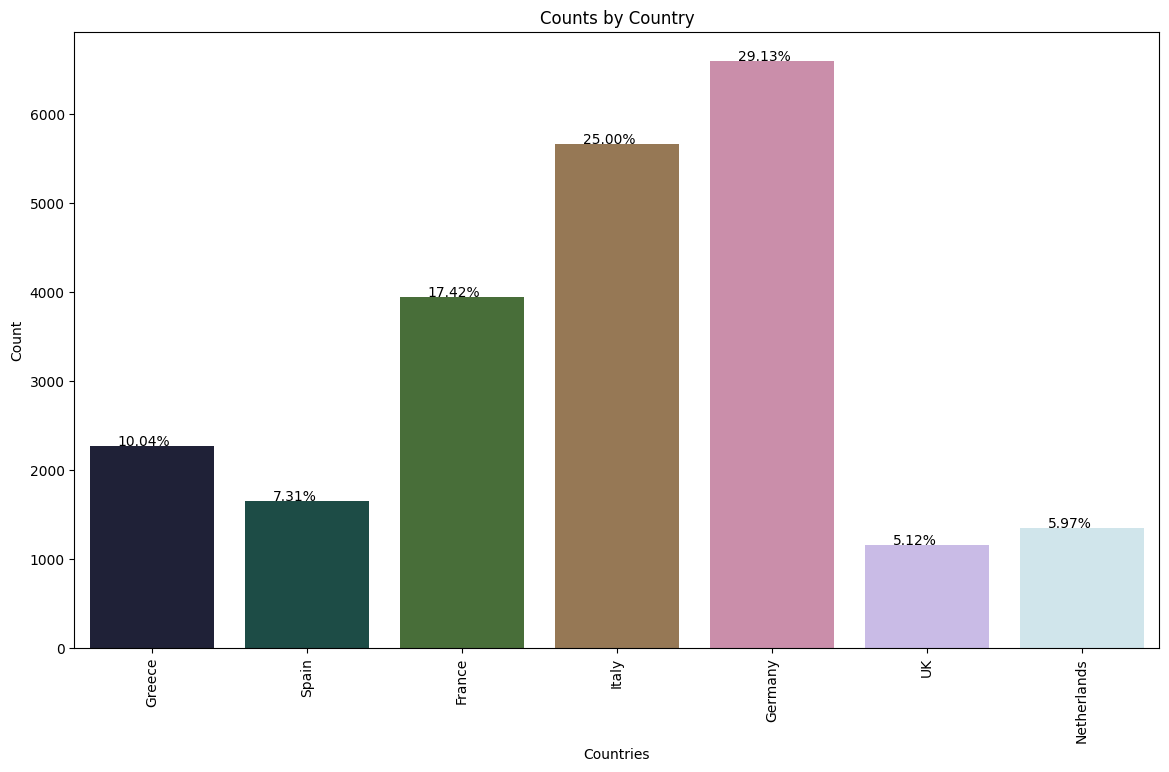

In [ ]:
# Setting up the figure size
plt.figure(figsize=(14, 8))

# Creating a countplot to visualize the counts of each Country
ax = sns.countplot(data=customers_df, x='GEOGRAPHY', palette = 'cubehelix')

total = float(len(customers_df))  # Calculating the total number of records in the DataFrame

# Looping through the bars in the countplot to add percentage labels
for p in ax.patches:
    percentage = '{:.2f}%'.format((p.get_height() / total) * 100)  # Calculate the percentage
    x = p.get_x() + p.get_width() / 2 - 0.22  # Calculate x-coordinate for label placement
    y = p.get_height() + 5  # Calculate y-coordinate for label placement
    ax.annotate(percentage, (x, y))  # Add the percentage label to the bar

# Setting the x-axis label
plt.xlabel('Countries')

# Setting the y-axis label
plt.ylabel('Count')

# Setting the title of the plot
plt.title('Counts by Country')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

**Varibile età**

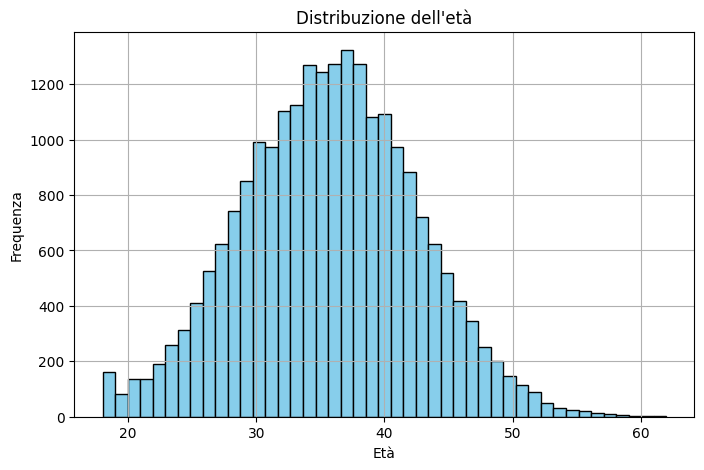

In [ ]:
# Imposta il numero di bin uguale all'intervallo delle età
min_eta = customers_df['AGE'].min()
max_eta = customers_df['AGE'].max()
num_bin = max_eta - min_eta + 1

# Plot dell'istogramma con un bin per ogni valore di età
plt.figure(figsize=(8, 5))
plt.hist(customers_df['AGE'], bins=num_bin, color='skyblue', edgecolor='black')
plt.xlabel('Età')
plt.ylabel('Frequenza')
plt.title('Distribuzione dell\'età')
plt.grid(True)
plt.show()

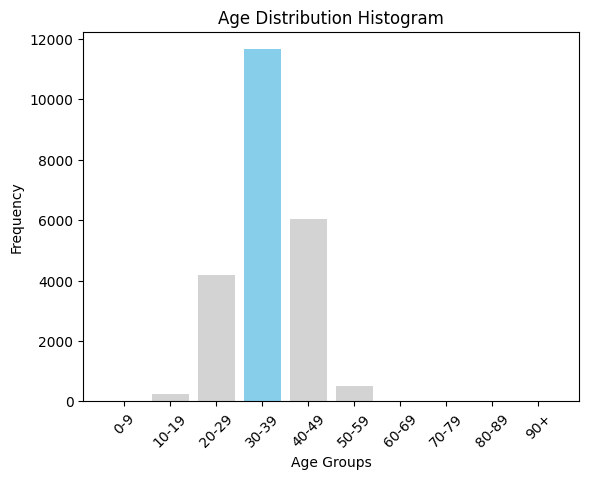

In [ ]:
# Define bins for age grouping
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Create age groups
customers_df['age_group'] = pd.cut(customers_df['AGE'], bins=bins, labels=labels, right=False)

# Count occurrences in each age group
frequencies = customers_df['age_group'].value_counts().reindex(labels)  # Reindex to ensure correct order

# Identify the age group with the highest frequency
max_frequency = frequencies.max()  # Use max() method
max_index = frequencies.idxmax()  # Use idxmax() to get the index of max frequency

# Create colors for each bar
colors = ['lightgrey'] * len(frequencies)  # Default color
colors[frequencies.index.get_loc(max_index)] = 'skyblue'  # Highlight the max group

# Plotting the histogram
plt.bar(frequencies.index, frequencies.values, color=colors)  # Use frequencies.index
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Age Distribution Histogram')
plt.xticks(rotation=45)
plt.show()

In [ ]:
for i, column in enumerate(categorical_columns):
  print(i)
  print(column)

0
GENDER
1
GEOGRAPHY


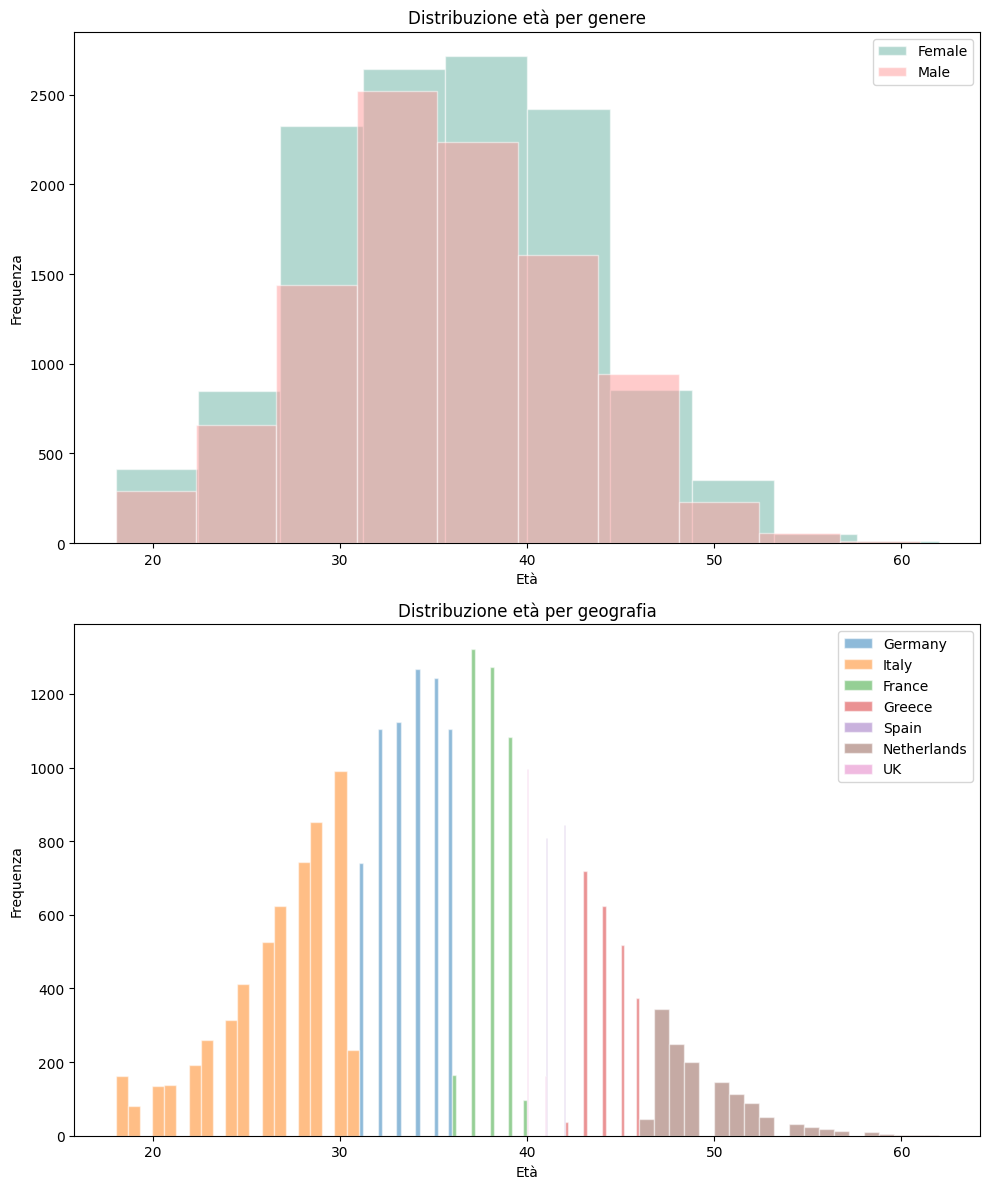

In [ ]:
# Creare il grafico con due sottoplot (uno per genere e uno per geografia)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Primo grafico: Distribuzione età per genere
axes[0].hist(customers_df[customers_df['GENDER'] == 'F']['AGE'], bins=10, alpha=0.5, label='Female', edgecolor='white', color='#69b3a2')
axes[0].hist(customers_df[customers_df['GENDER'] == 'M']['AGE'], bins=10, alpha=0.5, label='Male', edgecolor='white', color='#ff9999')

axes[0].set_title('Distribuzione età per genere')
axes[0].set_xlabel('Età')
axes[0].set_ylabel('Frequenza')
axes[0].legend()

# Secondo grafico: Distribuzione età per geografia
for country in ['Germany', 'Italy', 'France', 'Greece', 'Spain', 'Netherlands', 'UK']:
    axes[1].hist(customers_df[customers_df['GEOGRAPHY'] == country]['AGE'], bins=20, alpha=0.5, label=country, edgecolor='white')

axes[1].set_title('Distribuzione età per geografia')
axes[1].set_xlabel('Età')
axes[1].set_ylabel('Frequenza')
axes[1].legend()

# Miglioriamo il layout per evitare sovrapposizioni
plt.tight_layout()

# Mostriamo il grafico
plt.show()


In [ ]:
customers_df.groupby(['GEOGRAPHY']).agg({'AGE': [np.min, np.max]})

<ipython-input-59-9dea98ca5eda>:1: FutureWarning: The provided callable <function min at 0x7ce4013662a0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  customers_df.groupby(['GEOGRAPHY']).agg({'AGE': [np.min, np.max]})
<ipython-input-59-9dea98ca5eda>:1: FutureWarning: The provided callable <function max at 0x7ce401366160> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  customers_df.groupby(['GEOGRAPHY']).agg({'AGE': [np.min, np.max]})


AGE    
            min max
GEOGRAPHY          
France       36  40
Germany      31  36
Greece       42  46
Italy        18  31
Netherlands  46  62
Spain        41  42
UK           40  41

### Order data

In [ ]:
order_df = pd.read_excel(r"dataset/WB_Orders.xlsx", sheet_name="scanner_data", header=0)
order_df.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 573, in __init__
    self.book = self.load_workbook(self.handles.handle, engine_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_openpyxl.py", line 572, in load_workbook
    return load_workbook(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/openpyxl/reader/excel.py", line 348, in load_workbook
    reader.read()
  File "/usr/local/lib/python3.11/dist-packages/openpyxl/reader/excel.py", line 303, in read
    self.read_worksheets()
  File "/usr/local/lib/python3.11/dist-packages/openpyxl/reader/excel.py", line 228, in read_worksheets
    ws = ReadOnlyWorksheet(self.wb, sheet.name, rel.target, self.shared_strings)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/openpyxl/works

In [ ]:
order_missing_data = pd.DataFrame({'total_missing': order_df.isnull().sum(),
                             'perc_missing': (order_df.isnull().sum()/1500)*100}
                            )
order_missing_data

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-aeeaf589d136>", line 1, in <cell line: 0>
    order_missing_data = pd.DataFrame({'total_missing': order_df.isnull().sum(),
                                                        ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101

In [ ]:
# Inspect the Orders dataset
print(order_df.index.is_unique)
print(order_df.Transaction_ID.is_unique) ## transazioni ripetute -> andare a vedere se le transazioni hanno associate più customer_id diversi, e viceversa
print(order_df.columns.is_unique)
print(order_df[order_df.duplicated() == True])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-0b62a78d863e>", line 2, in <cell line: 0>
    print(order_df.index.is_unique)
          ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offse

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-0b62a78d863e>", line 2, in <cell line: 0>
    print(order_df.index.is_unique)
          ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
      

In [ ]:
# Raggruppa per Transaction_ID e conta i Customer_ID unici
transaction_counts = order_df.groupby("Transaction_ID")["Customer_ID"].nunique().reset_index()

# Filtra solo le transazioni con più di un cliente distinto
transaction_counts_filtered = transaction_counts[transaction_counts["Customer_ID"] > 1]

# Rinomina la colonna per corrispondere alla query SQL
transaction_counts_filtered.rename(columns={"Customer_ID": "count_distinct_customers"}, inplace=True)

# Mostra il risultato
print(transaction_counts_filtered)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-42b55d2175a6>", line 2, in <cell line: 0>
    transaction_counts = order_df.groupby("Transaction_ID")["Customer_ID"].nunique().reset_index()
                         ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_reco

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-42b55d2175a6>", line 2, in <cell line: 0>
    transaction_counts = order_df.groupby("Transaction_ID")["Customer_ID"].nunique().reset_index()
                         ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-42b55d2175a6>", line 2, in <cell line: 0>
    transaction_counts = order_df.groupby("Transaction_ID")["Customer_ID"].nunique().reset_index()
                         ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in

In [ ]:
# Raggruppa per Transaction_ID e conta i Customer_ID unici
transaction_counts = order_df.groupby("Customer_ID")["Transaction_ID"].nunique().reset_index()

# Filtra solo le transazioni con più di un cliente distinto
transaction_counts_filtered = transaction_counts[transaction_counts["Transaction_ID"] > 1]

# Rinomina la colonna per corrispondere alla query SQL
transaction_counts_filtered.rename(columns={"Transaction_ID": "count_distinct_transactions"}, inplace=True)

# Mostra il risultato
print(transaction_counts_filtered)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-854ae9bafc7d>", line 2, in <cell line: 0>
    transaction_counts = order_df.groupby("Customer_ID")["Transaction_ID"].nunique().reset_index()
                         ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_reco

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-854ae9bafc7d>", line 2, in <cell line: 0>
    transaction_counts = order_df.groupby("Customer_ID")["Transaction_ID"].nunique().reset_index()
                         ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in

In [ ]:
transaction_counts = order_df.groupby("Transaction_ID")["SKU_Category"].nunique().reset_index()

# Filtra solo le transazioni con più di un cliente distinto
transaction_counts_filtered = transaction_counts[transaction_counts["SKU_Category"] > 1]

# Rinomina la colonna per corrispondere alla query SQL
transaction_counts_filtered.rename(columns={"SKU_Category": "count_distinct_SKUs"}, inplace=True)

# Mostra il risultato
print(transaction_counts_filtered)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-a5bd98c585ef>", line 1, in <cell line: 0>
    transaction_counts = order_df.groupby("Transaction_ID")["SKU_Category"].nunique().reset_index()
                         ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_rec

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-a5bd98c585ef>", line 1, in <cell line: 0>
    transaction_counts = order_df.groupby("Transaction_ID")["SKU_Category"].nunique().reset_index()
                         ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, i

The orders data set is ready to use as no duplicated values for rows and columns, all of them are unique.

In [ ]:
order_df.columns

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-54496384b8be>", line 1, in <cell line: 0>
    order_df.columns
    ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
           ^^^^^^^

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-54496384b8be>", line 1, in <cell line: 0>
    order_df.columns
    ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
        ^^^^^^^^^^^^^^^^^^^

Top 20 acquirenti con relativo numero di ordini:

In [ ]:
order_df.groupby(['Customer_ID'])['Transaction_ID'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-f84e7fef5256>", line 1, in <cell line: 0>
    order_df.groupby(['Customer_ID'])['Transaction_ID'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
    ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", lin

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-4e1d115da28b>", line 5, in <cell line: 0>
    axes[0].hist(order_df.groupby('Customer_ID')['Transaction_ID'].count(), bins=30, edgecolor='black', alpha=0.7)
                 ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-4e1d115da28b>", line 5, in <cell line: 0>
    axes[0].hist(order_df.groupby('Customer_ID')['Transaction_ID'].count(), bins=30, edgecolor='black', alpha=0.7)
                 ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 

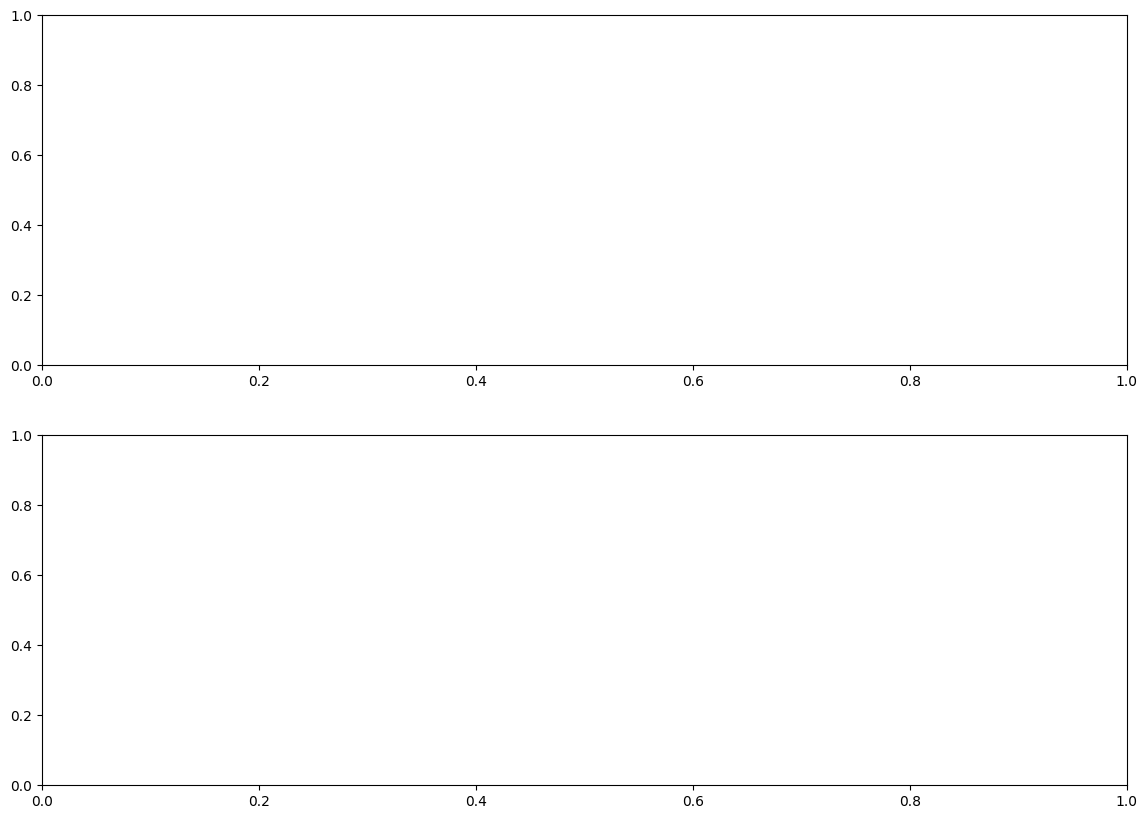

In [ ]:
# Creiamo la figura con due subplot affiancati (1 riga, 2 colonne)
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Istogramma del numero di acquisti per cliente
axes[0].hist(order_df.groupby('Customer_ID')['Transaction_ID'].count(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribuzione del numero di acquisti per cliente')
axes[0].set_xlabel('Numero di acquisti')
axes[0].set_ylabel('Numero di clienti')

# Boxplot per individuare outliers
sns.boxplot(x=order_df.groupby('Customer_ID')['Transaction_ID'].count(), ax=axes[1])
axes[1].set_title('Distribuzione del numero di acquisti per cliente')

# Sistemiamo lo spazio tra i plot
plt.tight_layout()

# Mostriamo i grafici
plt.show()

La moltitudine di punti oltre il whisker superiore rappresenta i clienti che hanno effettuato un numero di acquisti molto superiore alla media.
Si evidenzia quindi un numero elevato di outlier, il che significa che esiste un gruppo di clienti "big spender" che acquistano molto più della media. Ciò è coerente con l'istogramma: la maggior parte dei clienti ha pochi acquisti ma alcuni hanno effettuato centinaia di transazioni.

In [ ]:
# Raggruppiamo i dati per Customer_ID per ottenere il numero di acquisti e il totale speso
customer_spending = order_df.groupby('Customer_ID').agg(
    total_transactions=('Transaction_ID', 'count'),
    total_spent=('Sales_Amount', 'sum')
).reset_index()

# Creazione dello scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(customer_spending['total_transactions'], customer_spending['total_spent'], alpha=0.5, color='blue')
plt.xlabel('Numero di Acquisti (Transazioni)')
plt.ylabel('Totale Speso (€)')
plt.title('Scatter Plot: Numero di Acquisti vs Totale Speso')
plt.grid(True)

# Mostra il grafico
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-9aec191e586e>", line 2, in <cell line: 0>
    customer_spending = order_df.groupby('Customer_ID').agg(
                        ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(et

Il grafico mostra una relazione positiva tra il numero di acquisti e il totale speso: banalmente, più transazioni un cliente effettua, maggiore sarà il totale speso.

Inoltre, è possibile notare come la maggior parte dei punti si concentra nella parte inferiore sinistra del grafico, suggerendo che la maggioranza dei clienti effettua un numero relativamente basso di acquisti e spende importi più contenuti.

C'è una dispersione maggiore man mano che aumenta il numero di acquisti, con questi clienti che sono di fatto i big spenders. I punti più distanti dal resto del cluster principale, soprattutto quelli con un numero di acquisti maggiore di 100, potrebbero rappresentare clienti ad alto valore, magari utenti aziendali.

### Product description data

In [ ]:
product_description_df = pd.read_excel(r"dataset/WB_Orders.xlsx", sheet_name="product description_wb", header=0)
product_description_df = product_description_df[['SKU_Category', 'SKU', 'description ', 'marchio']]
product_description_df.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-18812b02992c>", line 1, in <cell line: 0>
    product_description_df = pd.read_excel(r"dataset/WB_Orders.xlsx", sheet_name="product description_wb", header=0)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 495, in read_excel
    io = ExcelFile(
         ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1550, in __init__
    ext = inspect_excel_format(
          ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1402, in inspect_excel_format
    with get_handle(
         ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pa

In [ ]:
len(product_description_df)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-2f2da4904e91>", line 1, in <cell line: 0>
    len(product_description_df)
        ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_line

In [ ]:
product_description_df.dtypes

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-f87caff9f3f9>", line 1, in <cell line: 0>
    product_description_df.dtypes
    ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-f87caff9f3f9>", line 1, in <cell line: 0>
    product_description_df.dtypes
    ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  

In [ ]:
prod_descr_missing_data = pd.DataFrame({'total_missing': product_description_df.isnull().sum(),
                             'perc_missing': (product_description_df.isnull().sum()/1500)*100}
                            )
prod_descr_missing_data

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-000b210c981b>", line 1, in <cell line: 0>
    prod_descr_missing_data = pd.DataFrame({'total_missing': product_description_df.isnull().sum(),
                                                             ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-000b210c981b>", line 1, in <cell line: 0>
    prod_descr_missing_data = pd.DataFrame({'total_missing': product_description_df.isnull().sum(),
                                                             ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.

In [ ]:
column_nan_count_isna = product_description_df.isna().sum()
column_nan_count_isna

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-f9e6ec2c4e7a>", line 1, in <cell line: 0>
    column_nan_count_isna = product_description_df.isna().sum()
                            ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records


In [ ]:
product_description_df.columns

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-596a9d929dd6>", line 1, in <cell line: 0>
    product_description_df.columns
    ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-596a9d929dd6>", line 1, in <cell line: 0>
    product_description_df.columns
    ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result, 

In [ ]:
product_description_df = product_description_df.rename(columns={product_description_df.columns[2]: "description"})
print(product_description_df.columns)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-8769be9dab01>", line 1, in <cell line: 0>
    product_description_df = product_description_df.rename(columns={product_description_df.columns[2]: "description"})
                             ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packa

In [ ]:
product_description_df["description"] = product_description_df["description"].str.replace(r":(\S)", r": \1", regex=True)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-7e0a5e8b0f8f>", line 1, in <cell line: 0>
    product_description_df["description"] = product_description_df["description"].str.replace(r":(\S)", r": \1", regex=True)
                                            ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-7e0a5e8b0f8f>", line 1, in <cell line: 0>
    product_description_df["description"] = product_description_df["description"].str.replace(r":(\S)", r": \1", regex=True)
                                            ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-7e0a5e8b0f8f>", line 1, in <cell line: 0>
    product_description_df["description"] = product_description_df["description"].str.replace(r":(\S)", r": \1", regex=True)
                                            ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/

In [ ]:
product_description_df[['description','marchio']] = product_description_df[['description','marchio']].astype("string")
product_description_df.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-64822f227411>", line 1, in <cell line: 0>
    product_description_df[['description','marchio']] = product_description_df[['description','marchio']].astype("string")
                                                        ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-64822f227411>", line 1, in <cell line: 0>
    product_description_df[['description','marchio']] = product_description_df[['description','marchio']].astype("string")
                                                        ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/

In [ ]:
# Remove the nan and fill the empty string
product_description_df[['description','marchio']] = product_description_df[['description','marchio']].replace(np.nan,'',regex = True)
product_description_df.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-2ece9e4e7846>", line 2, in <cell line: 0>
    product_description_df[['description','marchio']] = product_description_df[['description','marchio']].replace(np.nan,'',regex = True)
                                                        ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-2ece9e4e7846>", line 2, in <cell line: 0>
    product_description_df[['description','marchio']] = product_description_df[['description','marchio']].replace(np.nan,'',regex = True)
                                                        ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last)

In [ ]:
product_description_df[['description','marchio']] = product_description_df[['description','marchio']].astype(str).apply(lambda col: col.str.lower())
product_description_df.head(4)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-6f1dc7f39764>", line 1, in <cell line: 0>
    product_description_df[['description','marchio']] = product_description_df[['description','marchio']].astype(str).apply(lambda col: col.str.lower())
                                                        ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most re

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-6f1dc7f39764>", line 1, in <cell line: 0>
    product_description_df[['description','marchio']] = product_description_df[['description','marchio']].astype(str).apply(lambda col: col.str.lower())
                                                        ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most re

In [ ]:
# Definizione delle parole chiave per i generi
keywords = {
    "Women": r"\b(women|woman)\b",
    "Men": r"\b(men|man)\b",
    "Girls": r"\b(girls|girl)\b",
    "Boys": r"\b(boys|boy)\b",
    "Unisex": r"\b(unisex)\b"
}

# Creazione delle colonne per i generi
for gender, pattern in keywords.items():
    product_description_df[gender] = product_description_df["description"].str.contains(pattern, flags=re.IGNORECASE, regex=True).astype(int) # regex=False → Cerca la stringa esattamente così com'è

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-27c5d4af2de4>", line 12, in <cell line: 0>
    product_description_df[gender] = product_description_df["description"].str.contains(pattern, flags=re.IGNORECASE, regex=True).astype(int) # regex=False → Cerca la stringa esattamente così com'è
                                     ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception oc

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-27c5d4af2de4>", line 12, in <cell line: 0>
    product_description_df[gender] = product_description_df["description"].str.contains(pattern, flags=re.IGNORECASE, regex=True).astype(int) # regex=False → Cerca la stringa esattamente così com'è
                                     ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception oc

In [ ]:
# tools.display_dataframe_to_user(name="Dataset con colonne di genere", dataframe=df)
product_description_df.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-bf2b7a78a0f3>", line 2, in <cell line: 0>
    product_description_df.head(5)
    ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
           

In [ ]:
def extract_last_words(text):
    words = text.split()  # Divide il testo in parole
    num_words = min(len(words), 4)  # Prende fino a 4 parole se disponibili
    return ' '.join(words[-num_words:])  # Restituisce le ultime parole

In [ ]:
def clean_text(text):
    text = text.lower() # Convertire in minuscolo
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Rimuovere numeri e punteggiatura
    words = word_tokenize(text) # Tokenizzare il testo
    words = [word for word in words if word not in stop_words] # Rimuovere stopwords
    return words

In [ ]:
product_description_df['last_words'] = product_description_df['description'].apply(extract_last_words)
product_description_df['cleaned_words'] = product_description_df['last_words'].apply(clean_text)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-5bc2e81d5fe0>", line 1, in <cell line: 0>
    product_description_df['last_words'] = product_description_df['description'].apply(extract_last_words)
                                           ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-pac

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-5bc2e81d5fe0>", line 1, in <cell line: 0>
    product_description_df['last_words'] = product_description_df['description'].apply(extract_last_words)
                                           ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-pac

In [ ]:
product_description_df['list_string'] = [' '.join(map(str, l)) for l in product_description_df['cleaned_words']]
product_description_df.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-e4f1072849a5>", line 1, in <cell line: 0>
    product_description_df['list_string'] = [' '.join(map(str, l)) for l in product_description_df['cleaned_words']]
                                                                            ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-e4f1072849a5>", line 1, in <cell line: 0>
    product_description_df['list_string'] = [' '.join(map(str, l)) for l in product_description_df['cleaned_words']]
                                                                            ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):

In [ ]:
all_words = [word for sublist in product_description_df['cleaned_words'] for word in sublist]
word_counts = Counter(all_words)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-9255843447bd>", line 1, in <cell line: 0>
    all_words = [word for sublist in product_description_df['cleaned_words'] for word in sublist]
                                     ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/c

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-9255843447bd>", line 1, in <cell line: 0>
    all_words = [word for sublist in product_description_df['cleaned_words'] for word in sublist]
                                     ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/c

In [ ]:
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
word_counts_df = word_counts_df.rename(columns={word_counts_df.columns[0]: "word"})
word_counts_df = word_counts_df.rename(columns={word_counts_df.columns[1]: "freq"})
word_counts_df

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-432633151bfb>", line 1, in <cell line: 0>
    word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
                                            ^^^^^^^^^^^
NameError: name 'word_counts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-432633151bfb>", line 1, in <cell line: 0>
    word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
                                            ^^^^^^^^^^^
NameError: name 'word_counts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-432633151bfb>", line 1, in <cell line: 0>
    word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index').reset_index()
                                            ^^^^^^^^^^^
NameError: name 'word_counts' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", 

In [ ]:
word_counts_df['POS_Tagged_Text'] = word_counts_df['word'].apply(lambda item:item.strip().split()).apply(pos_tag)
word_counts_df['Just_Nouns_Text'] = word_counts_df['POS_Tagged_Text'].apply(lambda item:[w for w, t in item if t in ['NN', 'NNS']])
word_counts_df

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-643574b78996>", line 1, in <cell line: 0>
    word_counts_df['POS_Tagged_Text'] = word_counts_df['word'].apply(lambda item:item.strip().split()).apply(pos_tag)
                                        ^^^^^^^^^^^^^^
NameError: name 'word_counts_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IP

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-643574b78996>", line 1, in <cell line: 0>
    word_counts_df['POS_Tagged_Text'] = word_counts_df['word'].apply(lambda item:item.strip().split()).apply(pos_tag)
                                        ^^^^^^^^^^^^^^
NameError: name 'word_counts_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IP

In [ ]:
# word_counts_df.to_csv(os.path.join(dir_path, "word_counts_df.csv"), index=False)

togliere il marchio dalla descrizione -> inteso come toglierlo dalle prime parole della descrizione

In [ ]:
word_counts_df_new = pd.read_excel('dataset/word_counts_df_new.xlsx')
word_counts_df_new

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-f5236deed7aa>", line 1, in <cell line: 0>
    word_counts_df_new = pd.read_excel('dataset/word_counts_df_new.xlsx')
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 495, in read_excel
    io = ExcelFile(
         ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1550, in __init__
    ext = inspect_excel_format(
          ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1402, in inspect_excel_format
    with get_handle(
         ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/common.py", line 882, in get_handle
    handle = open(handle, ioargs.mode)
   

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-f5236deed7aa>", line 1, in <cell line: 0>
    word_counts_df_new = pd.read_excel('dataset/word_counts_df_new.xlsx')
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 495, in read_excel
    io = ExcelFile(
         ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1550, in __init__
    ext = inspect_excel_format(
          ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1402, in inspect_excel_format
    with get_handle(
         ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/common.py", line 882, in get_handle
    handle = open(handle, ioargs.mode)
   

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-f5236deed7aa>", line 1, in <cell line: 0>
    word_counts_df_new = pd.read_excel('dataset/word_counts_df_new.xlsx')
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 495, in read_excel
    io = ExcelFile(
         ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1550, in __init__
    ext = inspect_excel_format(
          ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/excel/_base.py", line 1402, in inspect_excel_format
    with get_handle(
         ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/io/common.py", line 882, in get_handle
    handle = open(handle, ioargs.mode)
   

In [ ]:
word_counts_df_new1 = word_counts_df_new[['word', 'category']]
word_counts_df_new1 = word_counts_df_new1.dropna()
word_counts_df_new1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-b6c8769a9f85>", line 1, in <cell line: 0>
    word_counts_df_new1 = word_counts_df_new[['word', 'category']]
                          ^^^^^^^^^^^^^^^^^^
NameError: name 'word_counts_df_new' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    ret

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-b6c8769a9f85>", line 1, in <cell line: 0>
    word_counts_df_new1 = word_counts_df_new[['word', 'category']]
                          ^^^^^^^^^^^^^^^^^^
NameError: name 'word_counts_df_new' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_no

In [ ]:
## Creazione di una funzione per associare la categoria alla colonna last_words
#def get_category(last_words, word_category_map):
#    words = set(last_words.split())  # Converti le parole in un set per confronto veloce
#    categories = {word_category_map[word] for word in words if word in word_category_map}
#    return ", ".join(categories) if categories else "Unknown"  # Se non c'è una corrispondenza, restituisce "Unknown"

In [ ]:
# Creazione di un dizionario per mappare parole a categorie
word_category_map = dict(zip(word_counts_df_new1["word"], word_counts_df_new1["category"])) ### indipendentemente dalla punteggiatura in mezzo alle parole, aka rimuovi eventuale punteggiatura
#product_description_df["category"] = product_description_df["list_string"].apply(lambda x: get_category(x, word_category_map))
#product_description_df.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-f228d5cd672e>", line 2, in <cell line: 0>
    word_category_map = dict(zip(word_counts_df_new1["word"], word_counts_df_new1["category"])) ### indipendentemente dalla punteggiatura in mezzo alle parole, aka rimuovi eventuale punteggiatura
                                 ^^^^^^^^^^^^^^^^^^^
NameError: name 'word_counts_df_new1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Trac

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-f228d5cd672e>", line 2, in <cell line: 0>
    word_category_map = dict(zip(word_counts_df_new1["word"], word_counts_df_new1["category"])) ### indipendentemente dalla punteggiatura in mezzo alle parole, aka rimuovi eventuale punteggiatura
                                 ^^^^^^^^^^^^^^^^^^^
NameError: name 'word_counts_df_new1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Trac

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-f228d5cd672e>", line 2, in <cell line: 0>
    word_category_map = dict(zip(word_counts_df_new1["word"], word_counts_df_new1["category"])) ### indipendentemente dalla punteggiatura in mezzo alle parole, aka rimuovi eventuale punteggiatura
                                 ^^^^^^^^^^^^^^^^^^^
NameError: name 'word_counts_df_new1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Trac

In [ ]:
# Filtra word_category_map per escludere parole con categoria "na" o None
filtered_word_category_map = {word: category for word, category in word_category_map.items() if category not in [None, "na"]}

# Funzione aggiornata per associare UNA SOLA categoria
def get_category(last_words, word_category_map):
    words = set(last_words.split())  # Converti le parole in un set per confronto veloce
    categories = [word_category_map[word] for word in words if word in word_category_map]
    return categories[0] if categories else "Unknown"  # Prende solo la prima categoria trovata

# Applicazione della funzione con la mappa filtrata
product_description_df["category"] = product_description_df["list_string"].apply(lambda x: get_category(x, filtered_word_category_map))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-6e6fd64e602b>", line 2, in <cell line: 0>
    filtered_word_category_map = {word: category for word, category in word_category_map.items() if category not in [None, "na"]}
                                                                       ^^^^^^^^^^^^^^^^^
NameError: name 'word_category_map' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
 

In [ ]:
product_description_df.loc[265]
# 41, 75, 79, 214, 225, 235, 236, 265

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-4f7fbe75333f>", line 1, in <cell line: 0>
    product_description_df.loc[265]
    ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_line

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-4f7fbe75333f>", line 1, in <cell line: 0>
    product_description_df.loc[265]
    ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,

In [ ]:
product_description_df.loc[product_description_df['category']=="accessori, abbigliamento"]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-46576a23c5c8>", line 1, in <cell line: 0>
    product_description_df.loc[product_description_df['category']=="accessori, abbigliamento"]
    ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_r

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-46576a23c5c8>", line 1, in <cell line: 0>
    product_description_df.loc[product_description_df['category']=="accessori, abbigliamento"]
    ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473,

In [ ]:
product_description_df[product_description_df['category'].isnull()]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-05c6ecc6339a>", line 1, in <cell line: 0>
    product_description_df[product_description_df['category'].isnull()]
    ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixe

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-05c6ecc6339a>", line 1, in <cell line: 0>
    product_description_df[product_description_df['category'].isnull()]
    ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    i

In [ ]:
product_description_df_unknown = product_description_df.loc[product_description_df['category'] == "Unknown"]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-9245de1a0c82>", line 1, in <cell line: 0>
    product_description_df_unknown = product_description_df.loc[product_description_df['category'] == "Unknown"]
                                     ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-pac

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-9245de1a0c82>", line 1, in <cell line: 0>
    product_description_df_unknown = product_description_df.loc[product_description_df['category'] == "Unknown"]
                                     ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-pac

In [ ]:
product_description_df_unknown.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-836b629f30b7>", line 1, in <cell line: 0>
    product_description_df_unknown.head(5)
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerfra

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-836b629f30b7>", line 1, in <cell line: 0>
    product_description_df_unknown.head(5)
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self

In [ ]:
product_description_df_no_unknown = product_description_df[product_description_df["category"] != "Unknown"]
product_description_df_no_unknown.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-338b628e6e4a>", line 1, in <cell line: 0>
    product_description_df_no_unknown = product_description_df[product_description_df["category"] != "Unknown"]
                                        ^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-p

In [ ]:
product_description_df_unknown = product_description_df_unknown.drop('category', axis=1)
product_description_df_unknown.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-310a0a97a0be>", line 1, in <cell line: 0>
    product_description_df_unknown = product_description_df_unknown.drop('category', axis=1)
                                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-package

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-310a0a97a0be>", line 1, in <cell line: 0>
    product_description_df_unknown = product_description_df_unknown.drop('category', axis=1)
                                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-package

In [ ]:
# Creazione di un dizionario per mappare parole a categorie
word_category_map = dict(zip(word_counts_df_new1["word"], word_counts_df_new1["category"])) ### indipendentemente dalla punteggiatura in mezzo alle parole, aka rimuovi eventuale punteggiatura
product_description_df_unknown["description_cleaned"] = product_description_df_unknown["description"].apply(clean_text)
product_description_df_unknown['description_list_string'] = [' '.join(map(str, l)) for l in product_description_df_unknown['description_cleaned']]
product_description_df_unknown["category"] = product_description_df_unknown["description_list_string"].apply(lambda x: get_category(x, word_category_map))
product_description_df_unknown.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-968ccf63c958>", line 2, in <cell line: 0>
    word_category_map = dict(zip(word_counts_df_new1["word"], word_counts_df_new1["category"])) ### indipendentemente dalla punteggiatura in mezzo alle parole, aka rimuovi eventuale punteggiatura
                                 ^^^^^^^^^^^^^^^^^^^
NameError: name 'word_counts_df_new1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Trac

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-968ccf63c958>", line 2, in <cell line: 0>
    word_category_map = dict(zip(word_counts_df_new1["word"], word_counts_df_new1["category"])) ### indipendentemente dalla punteggiatura in mezzo alle parole, aka rimuovi eventuale punteggiatura
                                 ^^^^^^^^^^^^^^^^^^^
NameError: name 'word_counts_df_new1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Trac

In [ ]:
product_description_df_unknown_second_run = product_description_df_unknown.loc[product_description_df_unknown['category'] == "Unknown"]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-3a4b582afbc5>", line 1, in <cell line: 0>
    product_description_df_unknown_second_run = product_description_df_unknown.loc[product_description_df_unknown['category'] == "Unknown"]
                                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-3a4b582afbc5>", line 1, in <cell line: 0>
    product_description_df_unknown_second_run = product_description_df_unknown.loc[product_description_df_unknown['category'] == "Unknown"]
                                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent 

In [ ]:
product_description_df_no_unknown_second_run = product_description_df_unknown[product_description_df_unknown["category"] != "Unknown"]
product_description_df_no_unknown_second_run.head(5) ## da ricongiure con l'altro

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-dd0351555def>", line 1, in <cell line: 0>
    product_description_df_no_unknown_second_run = product_description_df_unknown[product_description_df_unknown["category"] != "Unknown"]
                                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recen

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-dd0351555def>", line 1, in <cell line: 0>
    product_description_df_no_unknown_second_run = product_description_df_unknown[product_description_df_unknown["category"] != "Unknown"]
                                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recen

In [ ]:
category_update_dict = {
    "eau de toilette": "cura della persona",
    "face wash": "cura della persona",
    "pocket square": "accessori",
    "liquid lip": "cura della persona"
}

# Funzione per aggiornare la categoria se la descrizione contiene una delle parole chiave
def update_category(row):
    for phrase, new_category in category_update_dict.items():
        if phrase in row["description_list_string"].lower():  # Convertire in minuscolo per evitare problemi di case sensitivity
            return new_category
    return row["category"]  # Se nessuna frase corrisponde, mantiene la categoria originale

# Applicare la funzione alla colonna 'category'
product_description_df_unknown_second_run["category"] = product_description_df_unknown_second_run.apply(update_category, axis=1)

# Visualizzare il risultato
product_description_df_unknown_second_run.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-891b91b63270>", line 16, in <cell line: 0>
    product_description_df_unknown_second_run["category"] = product_description_df_unknown_second_run.apply(update_category, axis=1)
                                                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown_second_run' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurr

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-891b91b63270>", line 16, in <cell line: 0>
    product_description_df_unknown_second_run["category"] = product_description_df_unknown_second_run.apply(update_category, axis=1)
                                                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown_second_run' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurr

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-891b91b63270>", line 16, in <cell line: 0>
    product_description_df_unknown_second_run["category"] = product_description_df_unknown_second_run.apply(update_category, axis=1)
                                                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown_second_run' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurr

In [ ]:
product_description_df_unknown_second_run.loc[product_description_df_unknown_second_run['category'] == "Unknown"]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-110e922c8c2f>", line 1, in <cell line: 0>
    product_description_df_unknown_second_run.loc[product_description_df_unknown_second_run['category'] == "Unknown"]
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown_second_run' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-110e922c8c2f>", line 1, in <cell line: 0>
    product_description_df_unknown_second_run.loc[product_description_df_unknown_second_run['category'] == "Unknown"]
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown_second_run' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.1

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-110e922c8c2f>", line 1, in <cell line: 0>
    product_description_df_unknown_second_run.loc[product_description_df_unknown_second_run['category'] == "Unknown"]
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_unknown_second_run' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.1

In [ ]:
product_description_df_no_unknown = product_description_df_no_unknown[["SKU_Category","SKU","description","marchio","Women","Men","Girls","Boys","Unisex","category"]]
product_description_df_no_unknown_second_run = product_description_df_no_unknown_second_run[["SKU_Category","SKU","description","marchio","Women","Men","Girls","Boys","Unisex","category"]]
product_description_df_unknown_second_run = product_description_df_unknown_second_run[["SKU_Category","SKU","description","marchio","Women","Men","Girls","Boys","Unisex","category"]]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-ce42f3d98061>", line 1, in <cell line: 0>
    product_description_df_no_unknown = product_description_df_no_unknown[["SKU_Category","SKU","description","marchio","Women","Men","Girls","Boys","Unisex","category"]]
                                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_no_unknown' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occur

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-ce42f3d98061>", line 1, in <cell line: 0>
    product_description_df_no_unknown = product_description_df_no_unknown[["SKU_Category","SKU","description","marchio","Women","Men","Girls","Boys","Unisex","category"]]
                                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_no_unknown' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occur

In [ ]:
product_description_final = pd.concat([product_description_df_no_unknown, product_description_df_no_unknown_second_run, product_description_df_unknown_second_run], ignore_index=True)
print(len(product_description_final))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-f6cf758de9ec>", line 1, in <cell line: 0>
    product_description_final = pd.concat([product_description_df_no_unknown, product_description_df_no_unknown_second_run, product_description_df_unknown_second_run], ignore_index=True)
                                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_no_unknown' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, anot

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-f6cf758de9ec>", line 1, in <cell line: 0>
    product_description_final = pd.concat([product_description_df_no_unknown, product_description_df_no_unknown_second_run, product_description_df_unknown_second_run], ignore_index=True)
                                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_df_no_unknown' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, anot

Check sul genere: ad un prodotto sono assegnati più generi?

In [ ]:
product_description_final['genre_check'] = product_description_final['Women'] + product_description_final['Men'] + product_description_final['Girls'] + product_description_final['Boys'] + product_description_final['Unisex']

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-5e5513e3cf1f>", line 1, in <cell line: 0>
    product_description_final['genre_check'] = product_description_final['Women'] + product_description_final['Men'] + product_description_final['Girls'] + product_description_final['Boys'] + product_description_final['Unisex']
                                               ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-5e5513e3cf1f>", line 1, in <cell line: 0>
    product_description_final['genre_check'] = product_description_final['Women'] + product_description_final['Men'] + product_description_final['Girls'] + product_description_final['Boys'] + product_description_final['Unisex']
                                               ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-5e5513e3cf1f>", line 1, in <cell line: 0>
    product_description_final['genre_check'] = product_description_final['Women'] + product_description_final['Men'] + product_description_final['Girls'] + product_description_final['Boys'] + product_description_final['Unisex']
                                               ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling

In [ ]:
product_description_final[['description']].loc[product_description_final['genre_check'] > 1]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-38350c5de00f>", line 1, in <cell line: 0>
    product_description_final[['description']].loc[product_description_final['genre_check'] > 1]
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-38350c5de00f>", line 1, in <cell line: 0>
    product_description_final[['description']].loc[product_description_final['genre_check'] > 1]
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", li

In [ ]:
product_description_final.loc[1673, 'Girls']=0
product_description_final.loc[1674, 'Girls']=0
product_description_final.loc[3190, 'Boys']=0
product_description_final.loc[5129, 'Men']=0

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-7ad96d975b37>", line 1, in <cell line: 0>
    product_description_final.loc[1673, 'Girls']=0
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframe

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-7ad96d975b37>", line 1, in <cell line: 0>
    product_description_final.loc[1673, 'Girls']=0
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.r

In [ ]:
product_description_final['genre_check'] = product_description_final['Women'] + product_description_final['Men'] + product_description_final['Girls'] + product_description_final['Boys'] + product_description_final['Unisex']

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-5e5513e3cf1f>", line 1, in <cell line: 0>
    product_description_final['genre_check'] = product_description_final['Women'] + product_description_final['Men'] + product_description_final['Girls'] + product_description_final['Boys'] + product_description_final['Unisex']
                                               ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-5e5513e3cf1f>", line 1, in <cell line: 0>
    product_description_final['genre_check'] = product_description_final['Women'] + product_description_final['Men'] + product_description_final['Girls'] + product_description_final['Boys'] + product_description_final['Unisex']
                                               ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling

In [ ]:
product_description_final[['description']].loc[product_description_final['genre_check'] > 1]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-38350c5de00f>", line 1, in <cell line: 0>
    product_description_final[['description']].loc[product_description_final['genre_check'] > 1]
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-38350c5de00f>", line 1, in <cell line: 0>
    product_description_final[['description']].loc[product_description_final['genre_check'] > 1]
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", li

In [ ]:
product_description_final.head(3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-698e87fda0bc>", line 1, in <cell line: 0>
    product_description_final.head(3)
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-698e87fda0bc>", line 1, in <cell line: 0>
    product_description_final.head(3)
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code,

In [ ]:
#product_description_final.loc[product_description_final['category']=="altro"]
product_description_final.loc[40]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-8d57381e2643>", line 2, in <cell line: 0>
    product_description_final.loc[40]
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-8d57381e2643>", line 2, in <cell line: 0>
    product_description_final.loc[40]
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code,

#### Distribuzione delle categorie di prodotti da noi identificate

In [ ]:
product_description_final['category'].value_counts()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-4cf7dd2ad0ae>", line 1, in <cell line: 0>
    product_description_final['category'].value_counts()
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinne

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-4cf7dd2ad0ae>", line 1, in <cell line: 0>
    product_description_final['category'].value_counts()
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await 

In [ ]:
category_counts = product_description_final["category"].value_counts()

plt.figure(figsize=(8, 5))
category_counts.plot(kind="bar", color="skyblue")
plt.title("Distribuzione delle categorie di prodotto")
plt.xlabel("Categoria")
plt.ylabel("Numero di prodotti")
plt.xticks(rotation=45)
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-8259a6f54b1b>", line 1, in <cell line: 0>
    category_counts = product_description_final["category"].value_counts()
                      ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in g

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-8259a6f54b1b>", line 1, in <cell line: 0>
    category_counts = product_description_final["category"].value_counts()
                      ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3

#### Distribuzione delle categorie per genere

In [ ]:
category_gender_counts = product_description_final.groupby("category")[["Women", "Men", "Girls", "Boys", "Unisex"]].sum()

category_gender_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Distribuzione delle categorie per genere")
plt.xlabel("Categoria")
plt.ylabel("Numero di prodotti")
plt.legend(title="Genere")
plt.xticks(rotation=45)
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-dd9bd24e72ec>", line 1, in <cell line: 0>
    category_gender_counts = product_description_final.groupby("category")[["Women", "Men", "Girls", "Boys", "Unisex"]].sum()
                             ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-dd9bd24e72ec>", line 1, in <cell line: 0>
    category_gender_counts = product_description_final.groupby("category")[["Women", "Men", "Girls", "Boys", "Unisex"]].sum()
                             ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.

#### WORDCLOUD dei marchi con più prodotti

In [ ]:
text = " ".join(product_description_final["marchio"].dropna())
wordcloud = WordCloud(collocations=False, width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud dei Marchi")
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-19750f7b2faf>", line 1, in <cell line: 0>
    text = " ".join(product_description_final["marchio"].dropna())
                    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-19750f7b2faf>", line 1, in <cell line: 0>
    text = " ".join(product_description_final["marchio"].dropna())
                    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in ru

## Deep Dive Analysis

In [ ]:
order_df.head(1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-618aa52edac2>", line 1, in <cell line: 0>
    order_df.head(1)
    ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
           ^^^^^^^

In [ ]:
customers_df.head(1)

Customer_ID GENDER  AGE GEOGRAPHY age_group
0         2547      M   43    Greece     40-49

In [ ]:
product_description_final.head(1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-ffb9922bf73e>", line 1, in <cell line: 0>
    product_description_final.head(1)
    ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'product_description_final' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number

In [ ]:
## left join tra order_df, customer_id, per ottenere il campo geography e genere e product_description_final per ottenere la category
final_df0 = pd.merge(order_df, customers_df, on='Customer_ID', how='left')
final_df = pd.merge(final_df0, product_description_final, on=['SKU_Category', 'SKU'], how='left')
final_df.head(5)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-a017481d28a2>", line 2, in <cell line: 0>
    final_df0 = pd.merge(order_df, customers_df, on='Customer_ID', how='left')
                         ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixe

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-a017481d28a2>", line 2, in <cell line: 0>
    final_df0 = pd.merge(order_df, customers_df, on='Customer_ID', how='left')
                         ^^^^^^^^
NameError: name 'order_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    i

In [ ]:
final_df.columns

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-cd01bab09101>", line 1, in <cell line: 0>
    final_df.columns
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
           ^^^^^^^

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-cd01bab09101>", line 1, in <cell line: 0>
    final_df.columns
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
        ^^^^^^^^^^^^^^^^^^^

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-cd01bab09101>", line 1, in <cell line: 0>
    final_df.columns
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
        ^^^^^^^^^^^^^^^^^^^

In [ ]:
final_df = final_df.drop('genre_check', axis=1)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-fd390def0b9c>", line 1, in <cell line: 0>
    final_df = final_df.drop('genre_check', axis=1)
               ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-fd390def0b9c>", line 1, in <cell line: 0>
    final_df = final_df.drop('genre_check', axis=1)
               ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result, 

In [ ]:
len(final_df)==len(order_df)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-a5dc9100f37a>", line 1, in <cell line: 0>
    len(final_df)==len(order_df)
        ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-33-a5dc9100f37a>", line 1, in <cell line: 0>
    len(final_df)==len(order_df)
        ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
        ^^^

In [ ]:
## TO SAVE THE DATASET
#final_df.to_csv('dataset/final_df_new.csv', index=False, sep=';')

#### EDA

In [ ]:
final_df.loc[final_df['Sales_Amount'] < 0]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-37b046b6bac9>", line 1, in <cell line: 0>
    final_df.loc[final_df['Sales_Amount'] < 0]
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-37b046b6bac9>", line 1, in <cell line: 0>
    final_df.loc[final_df['Sales_Amount'] < 0]
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
 

In [ ]:
final_df_missing = pd.DataFrame({'total_missing': final_df.isnull().sum(),
                             'perc_missing': (final_df.isnull().sum()/1500)*100}
                            )
final_df_missing

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-106d505faac2>", line 1, in <cell line: 0>
    final_df_missing = pd.DataFrame({'total_missing': final_df.isnull().sum(),
                                                      ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-106d505faac2>", line 1, in <cell line: 0>
    final_df_missing = pd.DataFrame({'total_missing': final_df.isnull().sum(),
                                                      ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-106d505faac2>", line 1, in <cell line: 0>
    final_df_missing = pd.DataFrame({'total_missing': final_df.isnull().sum(),
                                                      ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line

In [ ]:
## duplicate rows
duplicate_rows_final_df = final_df[final_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_final_df.shape)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-fc3086c022e8>", line 2, in <cell line: 0>
    duplicate_rows_final_df = final_df[final_df.duplicated()]
                              ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerfr

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-fc3086c022e8>", line 2, in <cell line: 0>
    duplicate_rows_final_df = final_df[final_df.duplicated()]
                              ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await sel

In [ ]:
final_df.info()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-51ac002d03bb>", line 1, in <cell line: 0>
    final_df.info()
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
           ^^^^^^^^

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-51ac002d03bb>", line 1, in <cell line: 0>
    final_df.info()
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
        ^^^^^^^^^^^^^^^^^^^^

In [ ]:
# checking unique customer ID
print('Number of unique Customer_ID in the final_df column is', final_df['Customer_ID'].nunique())
print('Number of unique Customer_ID in the customers_df column is', customers_df['Customer_ID'].nunique())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-63611dd6c725>", line 2, in <cell line: 0>
    print('Number of unique Customer_ID in the final_df column is', final_df['Customer_ID'].nunique())
                                                                    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/I

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-63611dd6c725>", line 2, in <cell line: 0>
    print('Number of unique Customer_ID in the final_df column is', final_df['Customer_ID'].nunique())
                                                                    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/I

In [ ]:
final_df.describe()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-a8a579c05be5>", line 1, in <cell line: 0>
    final_df.describe()
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
           ^^^^

In [ ]:
final_df.describe(include='object')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-5e146fefebf8>", line 1, in <cell line: 0>
    final_df.describe(include='object')
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)

Analisi degli Ordini

In [ ]:
# Raggruppa per Transaction_ID e conta i Customer_ID unici
transaction_counts_new = final_df.groupby("Customer_ID")["Transaction_ID"].nunique().reset_index()

# Filtra solo le transazioni con più di un cliente distinto
transaction_counts_new_filtered = transaction_counts_new[transaction_counts_new["Transaction_ID"] > 1]

# Rinomina la colonna per corrispondere alla query SQL
transaction_counts_new_filtered.rename(columns={"Transaction_ID": "count_distinct_transactions"}, inplace=True)

# Mostra il risultato
print(transaction_counts_new_filtered)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-ed0189e3f776>", line 2, in <cell line: 0>
    transaction_counts_new = final_df.groupby("Customer_ID")["Transaction_ID"].nunique().reset_index()
                             ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-ed0189e3f776>", line 2, in <cell line: 0>
    transaction_counts_new = final_df.groupby("Customer_ID")["Transaction_ID"].nunique().reset_index()
                             ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-ed0189e3f776>", line 2, in <cell line: 0>
    transaction_counts_new = final_df.groupby("Customer_ID")["Transaction_ID"].nunique().reset_index()
                             ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 

In [ ]:
## Numero medio di ordini per cliente
final_df.groupby('Customer_ID')['Transaction_ID'].nunique().describe()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-e2a2b6f8c5b7>", line 2, in <cell line: 0>
    final_df.groupby('Customer_ID')['Transaction_ID'].nunique().describe()
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, num

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-e2a2b6f8c5b7>", line 2, in <cell line: 0>
    final_df.groupby('Customer_ID')['Transaction_ID'].nunique().describe()
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(co

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-e2a2b6f8c5b7>", line 2, in <cell line: 0>
    final_df.groupby('Customer_ID')['Transaction_ID'].nunique().describe()
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(co

In [ ]:
## Valore medio degli ordini
final_df.groupby('Transaction_ID')['Sales_Amount'].sum().describe()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-8d3f60cfbd75>", line 2, in <cell line: 0>
    final_df.groupby('Transaction_ID')['Sales_Amount'].sum().describe()
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number

In [ ]:
## Valore medio per category
category_avg_sales = final_df.groupby('category')['Sales_Amount'].mean().reset_index()
category_avg_sales.columns = ['Category', 'Average Sales Amount']
print(category_avg_sales)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-4cc6b89fe56d>", line 2, in <cell line: 0>
    category_avg_sales = final_df.groupby('category')['Sales_Amount'].mean().reset_index()
                         ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-4cc6b89fe56d>", line 2, in <cell line: 0>
    category_avg_sales = final_df.groupby('category')['Sales_Amount'].mean().reset_index()
                         ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast

Analisi delle vendite per category

In [ ]:
# categoria - mese, gradiente è il valore dell'acquisto
final_df_subset_category = final_df[['category', 'Date', 'Sales_Amount', 'Quantity']]
final_df_subset_category['yyyy-mm'] = final_df_subset_category['Date'].dt.strftime('%Y-%m')
final_df_subset_category.head(3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-6249400b43be>", line 2, in <cell line: 0>
    final_df_subset_category = final_df[['category', 'Date', 'Sales_Amount', 'Quantity']]
                               ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-6249400b43be>", line 2, in <cell line: 0>
    final_df_subset_category = final_df[['category', 'Date', 'Sales_Amount', 'Quantity']]
                               ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in ru

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-6249400b43be>", line 2, in <cell line: 0>
    final_df_subset_category = final_df[['category', 'Date', 'Sales_Amount', 'Quantity']]
                               ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in ru

In [ ]:
final_df_subset_category = final_df_subset_category[['category', 'yyyy-mm', 'Sales_Amount', 'Quantity']]
final_df_subset_category.head(3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-483f8a505b78>", line 1, in <cell line: 0>
    final_df_subset_category = final_df_subset_category[['category', 'yyyy-mm', 'Sales_Amount', 'Quantity']]
                               ^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_category' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/

In [ ]:
final_df_subset_category.loc[(final_df_subset_category['category']=="tecnologia") & (final_df_subset_category['yyyy-mm']=="2021-05")]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-39b04765f444>", line 1, in <cell line: 0>
    final_df_subset_category.loc[(final_df_subset_category['category']=="tecnologia") & (final_df_subset_category['yyyy-mm']=="2021-05")]
    ^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_category' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-package

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-39b04765f444>", line 1, in <cell line: 0>
    final_df_subset_category.loc[(final_df_subset_category['category']=="tecnologia") & (final_df_subset_category['yyyy-mm']=="2021-05")]
    ^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_category' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-package

In [ ]:
final_df_subset_category0 = final_df_subset_category.groupby(['category', 'yyyy-mm']).apply(
    lambda x: x['Sales_Amount'].sum() / x['Quantity'].sum()
).reset_index(name='avg_price_per_unit')

# Mostra il nuovo DataFrame
final_df_subset_category0.head(3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-9cbeb3acc34b>", line 1, in <cell line: 0>
    final_df_subset_category0 = final_df_subset_category.groupby(['category', 'yyyy-mm']).apply(
                                ^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_category' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/cor

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-9cbeb3acc34b>", line 1, in <cell line: 0>
    final_df_subset_category0 = final_df_subset_category.groupby(['category', 'yyyy-mm']).apply(
                                ^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_category' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/cor

In [ ]:
# Creazione della pivot table per la heatmap
final_df_subset_category_heatmap = final_df_subset_category0.pivot_table(values='avg_price_per_unit', index='category', columns='yyyy-mm', aggfunc=np.mean)

# Impostazione del grafico
plt.figure(figsize=(12, 7))  # Aumentiamo le dimensioni per una migliore leggibilità
sns.heatmap(final_df_subset_category_heatmap,
            annot=True, # Attiviamo i valori nelle celle (può essere disattivato con False se necessario)
            cmap="coolwarm",
            linewidths=0.5, # Aggiunge separazione tra le celle
            linecolor='gray', # Linee grigie per separazione
            cbar_kws={'label': 'Avg Price per Unit (€)'
            } # Etichetta per la barra dei colori
           )

# Aggiungiamo titoli e etichette chiare
plt.title("Heatmap - Prezzo Medio per Unità Venduta per Categoria e Mese", fontsize=14)
plt.xlabel("Mese (YYYY-MM)", fontsize=12)
plt.ylabel("Categoria", fontsize=12)

# Miglioriamo la leggibilità delle etichette sugli assi
plt.xticks(rotation=45, ha='right', fontsize=10)  # Ruotiamo le etichette YYYY-MM per leggibilità
plt.yticks(fontsize=10)

# Mostriamo il grafico
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-60306580bc57>", line 2, in <cell line: 0>
    final_df_subset_category_heatmap = final_df_subset_category0.pivot_table(values='avg_price_per_unit', index='category', columns='yyyy-mm', aggfunc=np.mean)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_category0' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-60306580bc57>", line 2, in <cell line: 0>
    final_df_subset_category_heatmap = final_df_subset_category0.pivot_table(values='avg_price_per_unit', index='category', columns='yyyy-mm', aggfunc=np.mean)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_category0' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-60306580bc57>", line 2, in <cell line: 0>
    final_df_subset_category_heatmap = final_df_subset_category0.pivot_table(values='avg_price_per_unit', index='category', columns='yyyy-mm', aggfunc=np.mean)
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_category0' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent

Analisi delle vendite per età

In [ ]:
# heatmap: età x mensile e come colore prezzo
final_df_subset_age = final_df[['age_group', 'Date', 'Sales_Amount', 'Quantity']]
final_df_subset_age['yyyy-mm'] = final_df_subset_age['Date'].dt.to_period('M')
final_df_subset_age

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-e774cac84316>", line 2, in <cell line: 0>
    final_df_subset_age = final_df[['age_group', 'Date', 'Sales_Amount', 'Quantity']]
                          ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    retu

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-e774cac84316>", line 2, in <cell line: 0>
    final_df_subset_age = final_df[['age_group', 'Date', 'Sales_Amount', 'Quantity']]
                          ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nod

In [ ]:
final_df_subset_age = final_df_subset_age[['age_group', 'yyyy-mm', 'Sales_Amount', 'Quantity']]
final_df_subset_age.head(3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-7f39fde82e04>", line 1, in <cell line: 0>
    final_df_subset_age = final_df_subset_age[['age_group', 'yyyy-mm', 'Sales_Amount', 'Quantity']]
                          ^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_age' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py"

In [ ]:
final_df_subset_age0 = final_df_subset_age.groupby(['age_group', 'yyyy-mm']).apply(
    lambda x: x['Sales_Amount'].sum() / x['Quantity'].sum().astype(float)
).reset_index(name='avg_price_per_unit')

# Mostra il nuovo DataFrame
final_df_subset_age0.head(3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-71d032c70134>", line 1, in <cell line: 0>
    final_df_subset_age0 = final_df_subset_age.groupby(['age_group', 'yyyy-mm']).apply(
                           ^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_age' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-71d032c70134>", line 1, in <cell line: 0>
    final_df_subset_age0 = final_df_subset_age.groupby(['age_group', 'yyyy-mm']).apply(
                           ^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_age' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", 

In [ ]:
# Creazione della pivot table per la heatmap
final_df_subset_age_heatmap = final_df_subset_age0.pivot_table(values='avg_price_per_unit', index='age_group', columns='yyyy-mm', aggfunc=np.mean)

# Impostazione del grafico
plt.figure(figsize=(12, 7))  # Aumentiamo le dimensioni per una migliore leggibilità
sns.heatmap(final_df_subset_age_heatmap,
            annot=True,             # Disattiviamo i valori nelle celle (può essere attivato se necessario)
            cmap="coolwarm",         # Usare colori con buon contrasto (alternativa: "viridis")
            linewidths=0.5,          # Aggiunge separazione tra le celle
            linecolor='gray',        # Linee grigie per separazione
            cbar_kws={'label': 'Avg Price per Unit (€)'}  # Etichetta per la barra dei colori
           )

# Aggiungiamo titoli e etichette chiare
plt.title("Heatmap - Prezzo Medio per Unità Venduta per Fascia d'età e Mese", fontsize=14)
plt.xlabel("Mese (YYYY-MM)", fontsize=12)
plt.ylabel("Age", fontsize=12)

# Miglioriamo la leggibilità delle etichette sugli assi
plt.xticks(rotation=45, ha='right', fontsize=10)  # Ruotiamo le etichette YYYY-MM per leggibilità
plt.yticks(fontsize=10)

# Mostriamo il grafico
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-603cd2d45b6c>", line 2, in <cell line: 0>
    final_df_subset_age_heatmap = final_df_subset_age0.pivot_table(values='avg_price_per_unit', index='age_group', columns='yyyy-mm', aggfunc=np.mean)
                                  ^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_age0' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/us

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-603cd2d45b6c>", line 2, in <cell line: 0>
    final_df_subset_age_heatmap = final_df_subset_age0.pivot_table(values='avg_price_per_unit', index='age_group', columns='yyyy-mm', aggfunc=np.mean)
                                  ^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_age0' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/us

In [ ]:
# heatmap: età x mensile e come colore prezzo
final_df_subset_age_transactions = final_df[['age_group', 'Date', 'Sales_Amount', 'Transaction_ID']]
final_df_subset_age_transactions['yyyy-mm'] = final_df_subset_age_transactions['Date'].dt.to_period('M')
final_df_subset_age_transactions = final_df_subset_age_transactions[['age_group', 'yyyy-mm', 'Sales_Amount', 'Transaction_ID']]
final_df_subset_age_transactions.head(3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-8b588f97e581>", line 2, in <cell line: 0>
    final_df_subset_age_transactions = final_df[['age_group', 'Date', 'Sales_Amount', 'Transaction_ID']]
                                       ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", li

In [ ]:
final_df_subset_age_transactions0 = final_df_subset_age_transactions.groupby(['age_group', 'yyyy-mm']).apply(
    lambda x: x['Sales_Amount'].sum() / x['Transaction_ID'].count().astype(float)
).reset_index(name='avg_price_per_transaction')

# Mostra il nuovo DataFrame
final_df_subset_age_transactions0.head(3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-44f2be8c991d>", line 1, in <cell line: 0>
    final_df_subset_age_transactions0 = final_df_subset_age_transactions.groupby(['age_group', 'yyyy-mm']).apply(
                                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_age_transactions' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local

In [ ]:
# Creazione della pivot table per la heatmap
final_df_subset_age_transactions_heatmap = final_df_subset_age_transactions0.pivot_table(values='avg_price_per_transaction', index='age_group', columns='yyyy-mm', aggfunc=np.mean)

# Impostazione del grafico
plt.figure(figsize=(12, 7))  # Aumentiamo le dimensioni per una migliore leggibilità
sns.heatmap(final_df_subset_age_transactions_heatmap,
            annot=True,             # Disattiviamo i valori nelle celle (può essere attivato se necessario)
            cmap="coolwarm",         # Usare colori con buon contrasto (alternativa: "viridis")
            linewidths=0.5,          # Aggiunge separazione tra le celle
            linecolor='gray',        # Linee grigie per separazione
            cbar_kws={'label': 'Avg Price per Transaction (€)'}  # Etichetta per la barra dei colori
           )

# Aggiungiamo titoli e etichette chiare
plt.title("Heatmap - Prezzo Medio per Transazione per Fascia d'età e Mese", fontsize=14)
plt.xlabel("Mese (YYYY-MM)", fontsize=12)
plt.ylabel("Age", fontsize=12)

# Miglioriamo la leggibilità delle etichette sugli assi
plt.xticks(rotation=45, ha='right', fontsize=10)  # Ruotiamo le etichette YYYY-MM per leggibilità
plt.yticks(fontsize=10)

# Mostriamo il grafico
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-bc65cbca5bd8>", line 2, in <cell line: 0>
    final_df_subset_age_transactions_heatmap = final_df_subset_age_transactions0.pivot_table(values='avg_price_per_transaction', index='age_group', columns='yyyy-mm', aggfunc=np.mean)
                                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_age_transactions0' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, ano

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-bc65cbca5bd8>", line 2, in <cell line: 0>
    final_df_subset_age_transactions_heatmap = final_df_subset_age_transactions0.pivot_table(values='avg_price_per_transaction', index='age_group', columns='yyyy-mm', aggfunc=np.mean)
                                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_age_transactions0' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, ano

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-bc65cbca5bd8>", line 2, in <cell line: 0>
    final_df_subset_age_transactions_heatmap = final_df_subset_age_transactions0.pivot_table(values='avg_price_per_transaction', index='age_group', columns='yyyy-mm', aggfunc=np.mean)
                                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_age_transactions0' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, ano

In [ ]:
# heatmap: età x mensile e come colore prezzo
final_df_subset_age_transactions_new = final_df[['age_group', 'Date', 'Transaction_ID', 'Customer_ID']]
final_df_subset_age_transactions_new['yyyy-mm'] = final_df_subset_age_transactions_new['Date'].dt.to_period('M')
final_df_subset_age_transactions_new = final_df_subset_age_transactions_new[['age_group', 'yyyy-mm', 'Transaction_ID', 'Customer_ID']]
final_df_subset_age_transactions_new.head(3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-cc95f35db70a>", line 2, in <cell line: 0>
    final_df_subset_age_transactions_new = final_df[['age_group', 'Date', 'Transaction_ID', 'Customer_ID']]
                                           ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-cc95f35db70a>", line 2, in <cell line: 0>
    final_df_subset_age_transactions_new = final_df[['age_group', 'Date', 'Transaction_ID', 'Customer_ID']]
                                           ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interact

In [ ]:
final_df_subset_age_transactions_new0 = final_df_subset_age_transactions_new.groupby(['age_group', 'yyyy-mm']).apply(
    lambda x: x['Transaction_ID'].count().astype(float) / x['Customer_ID'].nunique()
).reset_index(name='count_of_transactions')

# Mostra il nuovo DataFrame
final_df_subset_age_transactions_new0.head(3)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-a4db036197d6>", line 1, in <cell line: 0>
    final_df_subset_age_transactions_new0 = final_df_subset_age_transactions_new.groupby(['age_group', 'yyyy-mm']).apply(
                                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_age_transactions_new' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last)

In [ ]:
# Creazione della pivot table per la heatmap
final_df_subset_age_transactions_new_heatmap = final_df_subset_age_transactions_new0.pivot_table(values='count_of_transactions', index='age_group', columns='yyyy-mm', aggfunc=np.mean)

# Impostazione del grafico
plt.figure(figsize=(12, 7))  # Aumentiamo le dimensioni per una migliore leggibilità
sns.heatmap(final_df_subset_age_transactions_new_heatmap,
            annot=False,             # Disattiviamo i valori nelle celle (può essere attivato se necessario)
            cmap="coolwarm",         # Usare colori con buon contrasto (alternativa: "viridis")
            linewidths=0.5,          # Aggiunge separazione tra le celle
            linecolor='gray',        # Linee grigie per separazione
            cbar_kws={'label': 'Number of Transactions'}  # Etichetta per la barra dei colori
           )

# Aggiungiamo titoli e etichette chiare
plt.title("Heatmap - Numero di transazioni per Fascia d'età e Mese", fontsize=14)
plt.xlabel("Mese (YYYY-MM)", fontsize=12)
plt.ylabel("Age", fontsize=12)

# Miglioriamo la leggibilità delle etichette sugli assi
plt.xticks(rotation=45, ha='right', fontsize=10)  # Ruotiamo le etichette YYYY-MM per leggibilità
plt.yticks(fontsize=10)

# Mostriamo il grafico
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-49e57cf3da3a>", line 2, in <cell line: 0>
    final_df_subset_age_transactions_new_heatmap = final_df_subset_age_transactions_new0.pivot_table(values='count_of_transactions', index='age_group', columns='yyyy-mm', aggfunc=np.mean)
                                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
NameError: name 'final_df_subset_age_transactions_new0' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the abov

Analisi delle vendite per genere

In [ ]:
customer_spending_per_genre = final_df.groupby(['Customer_ID','GENDER']).agg(
    total_transactions=('Transaction_ID', 'count'),
    total_spent=('Sales_Amount', 'sum')
).reset_index()

# Mappatura dei colori per il genere
gender_colors = {'M': 'blue', 'F': 'red'}

# Creazione dello scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_spending_per_genre['total_transactions'],
    y=customer_spending_per_genre['total_spent'],
    hue=customer_spending_per_genre['GENDER'],
    palette=gender_colors,
    alpha=0.6
)

plt.xlabel('Numero di Acquisti (Transazioni)')
plt.ylabel('Totale Speso (€)')
plt.title('Scatter Plot: Numero di Acquisti vs Totale Speso (Colore per Genere)')
plt.grid(True)
plt.legend(title='Genere')

# Mostra il grafico
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-60111612d577>", line 1, in <cell line: 0>
    customer_spending_per_genre = final_df.groupby(['Customer_ID','GENDER']).agg(
                                  ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-60111612d577>", line 1, in <cell line: 0>
    customer_spending_per_genre = final_df.groupby(['Customer_ID','GENDER']).agg(
                                  ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast

Analisi delle vendite per geografia

In [ ]:
# Raggruppamento dei dati per cliente
customer_spending = final_df.groupby(['Customer_ID', 'GEOGRAPHY']).agg(
    total_transactions=('Transaction_ID', 'count'),
    total_spent=('Sales_Amount', 'sum')
).reset_index()

# Creazione di una mappa colori per ogni paese
unique_countries = customer_spending['GEOGRAPHY'].unique()
country_colors = {country: plt.cm.tab10(i) for i, country in enumerate(unique_countries)}

# Creazione dello scatter plot
plt.figure(figsize=(10, 6))
for country in unique_countries:
    subset = customer_spending[customer_spending['GEOGRAPHY'] == country]
    plt.scatter(subset['total_transactions'], subset['total_spent'],
                alpha=0.5, label=country, color=country_colors[country])

plt.xlabel('Numero di Acquisti (Transazioni)')
plt.ylabel('Totale Speso (€)')
plt.title('Scatter Plot: Numero di Acquisti vs Totale Speso per Paese')
plt.legend(title="Paese")
plt.grid(True)

# Mostra il grafico
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-0d357c0fbbd3>", line 2, in <cell line: 0>
    customer_spending = final_df.groupby(['Customer_ID', 'GEOGRAPHY']).agg(
                        ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_ge

#### Matrice di contingenza
Una matrice di contingenza mostra la distribuzione congiunta di due variabili categoriche, aiutando a capire se esiste una relazione tra di esse.

In [ ]:
# Matrice di contingenza: Genere vs Geography
contingency_table = pd.crosstab(final_df['GENDER'], final_df['GEOGRAPHY'])
print("Matrice di contingenza:\n", contingency_table)

plt.figure(figsize=(10,6))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")
plt.title("Distribuzione dei Paesi per genere")
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-34087f8c269d>", line 2, in <cell line: 0>
    contingency_table = pd.crosstab(final_df['GENDER'], final_df['GEOGRAPHY'])
                                    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    r

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-34087f8c269d>", line 2, in <cell line: 0>
    contingency_table = pd.crosstab(final_df['GENDER'], final_df['GEOGRAPHY'])
                                    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_

In [ ]:
# Test del chi-quadrato
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")
print("\n Expected frequencies:\n", expected)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-8fe9e8591874>", line 2, in <cell line: 0>
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
                                                    ^^^^^^^^^^^^^^^^^
NameError: name 'contingency_table' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 

In alcuni paesi ci sono discrepanze maggiori tra gli acquisti effettuati da utenti di diverso genere: c'è più equilibrio nel numero di acquisti effettuati dai due generi in Francia, Grecia, Olanda, Spagna e Inghilterra. Al contrario, in Germania e in Italia, tale differenza è più marcata.

In [ ]:
# Matrice di contingenza: Genere vs Category
contingency_table1 = pd.crosstab(final_df['GENDER'], final_df['category'])
print("Matrice di contingenza:\n", contingency_table1)

plt.figure(figsize=(10,6))
sns.heatmap(contingency_table1, annot=True, cmap="Blues", fmt="d")
plt.title("Distribuzione delle categorie per genere")
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-24d3398d263c>", line 2, in <cell line: 0>
    contingency_table1 = pd.crosstab(final_df['GENDER'], final_df['category'])
                                     ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-24d3398d263c>", line 2, in <cell line: 0>
    contingency_table1 = pd.crosstab(final_df['GENDER'], final_df['category'])
                                     ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast

In [ ]:
# Test del chi-quadrato
chi2, p, dof, expected = stats.chi2_contingency(contingency_table1)
print(f"Chi-squared: {chi2}, p-value: {p}")
print("\n Expected frequencies:\n", expected)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-0c4b4e6c4b7d>", line 2, in <cell line: 0>
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table1)
                                                    ^^^^^^^^^^^^^^^^^^
NameError: name 'contingency_table1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", li

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-0c4b4e6c4b7d>", line 2, in <cell line: 0>
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table1)
                                                    ^^^^^^^^^^^^^^^^^^
NameError: name 'contingency_table1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshel

Dal test del chi-quadrato effettuato sulle variabili Gender e category, risulta invece che non vi sia una relazione statisticamente significativa tra genere e category.

#### Calcolo dell'eta di Pearson
L'eta di Pearson può essere utile a misurare la forza e la direzione della relazione lineare tra due variabili continue, come ad esempio la variabile AGE e la variabile Sales_Amount (o qualsiasi altra variabile quantitativa).

Il coefficiente di Pearson varia tra -1 e 1:
- Un valore di 1 indica una correlazione positiva perfetta (quando una variabile aumenta, anche l'altra aumenta).
- Un valore di -1 indica una correlazione negativa perfetta (quando una variabile aumenta, l'altra diminuisce).
- Un valore di 0 indica che non c'è alcuna correlazione lineare tra le due variabili.

In [ ]:
correlation = final_df['AGE'].corr(final_df['Sales_Amount'])

print(f"Il coefficiente di correlazione di Pearson tra l'età e l'importo delle vendite è: {correlation}")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-14e57001729e>", line 1, in <cell line: 0>
    correlation = final_df['AGE'].corr(final_df['Sales_Amount'])
                  ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb,

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-14e57001729e>", line 1, in <cell line: 0>
    correlation = final_df['AGE'].corr(final_df['Sales_Amount'])
                  ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_cod

Il valore dell'eta di Pearson indica che c'è una correlazione molto debole tra l'età dei clienti e l'importo totale delle vendite. In pratica, significa che non c'è una relazione lineare significativa tra queste due variabili.

Il coefficiente è coerente con l'heatmap fatto sul Prezzo Medio per Transazione per Fascia d'età e Mese.

L'età dei clienti non sembra influenzare l'importo totale delle vendite in modo evidente. Questo risultato suggerisce che altre variabili potrebbero essere più rilevanti per spiegare le variazioni nelle vendite, e potrebbe valere la pena esplorare ulteriori analisi o considerare altre variabili.

## Time Series Analysis + Forecasting (with regression)
https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

In [ ]:
final_df["datetime"] = pd.to_datetime(final_df["Date"])
print("The min date in the final_df table is: ", final_df["datetime"].min(), "\n", "The max date in the final_df table is: ", final_df["datetime"].max())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-17cb060434db>", line 1, in <cell line: 0>
    final_df["datetime"] = pd.to_datetime(final_df["Date"])
                                          ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-17cb060434db>", line 1, in <cell line: 0>
    final_df["datetime"] = pd.to_datetime(final_df["Date"])
                                          ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if 

In [ ]:
final_df["datetime"].max() - final_df["datetime"].min()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-d9533bcb0234>", line 1, in <cell line: 0>
    final_df["datetime"].max() - final_df["datetime"].min()
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-d9533bcb0234>", line 1, in <cell line: 0>
    final_df["datetime"].max() - final_df["datetime"].min()
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  as

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-d9533bcb0234>", line 1, in <cell line: 0>
    final_df["datetime"].max() - final_df["datetime"].min()
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  as

In [ ]:
final_df['datetime'].nunique()
## vedi se ci sono dei giorni ripetuti

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-f6545dfa7998>", line 1, in <cell line: 0>
    final_df['datetime'].nunique()
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
    

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-f6545dfa7998>", line 1, in <cell line: 0>
    final_df['datetime'].nunique()
    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
        ^^^^^

### Esplorazione e Visualizzazione

#### Grafici della serie storica

In [ ]:
# plot delle due serie storiche per genere sarebbe carino,
# plot delle serie storiche anche della category
# plot delle serie storiche anche della geografia

In [ ]:
## figo anche: andamento indice, che sia calcolato come totale speso/numero
# prodotti acquistati, ci sono fasce di clienti che sono trasversalmente migliori?

In [ ]:
# Supponendo che il tuo dataframe si chiami final_df
# Aggregare le sales_amount e le quantity per giorno
daily_sales = final_df.groupby(final_df["datetime"].dt.date)["Sales_Amount"].sum().reset_index()
daily_quantity = final_df.groupby(final_df["datetime"].dt.date)["Quantity"].sum().reset_index()

# Rinominare le colonne per chiarezza
daily_sales.columns = ["datetime", "Sales_Amount"]
daily_quantity.columns = ["datetime", "Quantity"]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-c3702efd6ecf>", line 3, in <cell line: 0>
    daily_sales = final_df.groupby(final_df["datetime"].dt.date)["Sales_Amount"].sum().reset_index()
                  ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-c3702efd6ecf>", line 3, in <cell line: 0>
    daily_sales = final_df.groupby(final_df["datetime"].dt.date)["Sales_Amount"].sum().reset_index()
                  ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-c3702efd6ecf>", line 3, in <cell line: 0>
    daily_sales = final_df.groupby(final_df["datetime"].dt.date)["Sales_Amount"].sum().reset_index()
                  ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-9b5ca9d2f474>", line 5, in <cell line: 0>
    axs[0].plot(daily_sales["datetime"], daily_sales["Sales_Amount"])
                ^^^^^^^^^^^
NameError: name 'daily_sales' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerfr

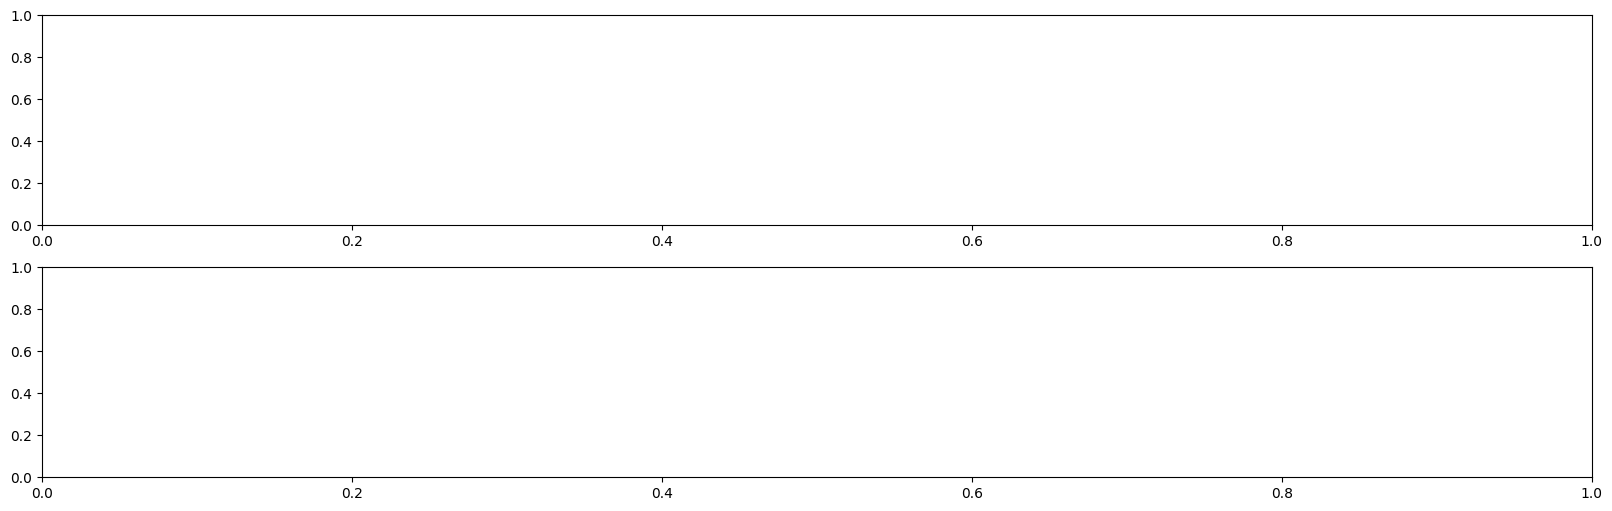

In [ ]:
# Impostare la dimensione del grafico e il layout
fig, axs = plt.subplots(2, 1, figsize=(20, 6))

# Creare il grafico delle vendite giornaliere
axs[0].plot(daily_sales["datetime"], daily_sales["Sales_Amount"])
axs[0].set_title("Sales Amount per Day")
axs[0].set_xlabel("datetime")
axs[0].set_ylabel("Sales Amount")
axs[0].tick_params(axis='x', rotation=45)

# Creare il grafico delle quantità giornaliere
axs[1].plot(daily_quantity["datetime"], daily_quantity["Quantity"], color='orange')
axs[1].set_title("Quantity per Day")
axs[1].set_xlabel("datetime")
axs[1].set_ylabel("Quantity")
axs[1].tick_params(axis='x', rotation=45)

# Migliorare la disposizione
plt.tight_layout()

In [ ]:
final_df_copy = final_df.copy()
final_df_copy.set_index('datetime', inplace=True)

# Aggregare le sales_amount e le quantity per mese
monthly_sales = final_df_copy['Sales_Amount'].resample('M').sum().reset_index()
monthly_quantity = final_df_copy['Quantity'].resample('M').sum().reset_index()

# Rinominare le colonne per chiarezza
monthly_sales.columns = ["datetime", "Sales_Amount"]
monthly_quantity.columns = ["datetime", "Quantity"]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-e1eed90f455f>", line 1, in <cell line: 0>
    final_df_copy = final_df.copy()
                    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-f4cb662715bc>", line 5, in <cell line: 0>
    axs[0].plot(monthly_sales["datetime"], monthly_sales["Sales_Amount"])
                ^^^^^^^^^^^^^
NameError: name 'monthly_sales' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_ge

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-f4cb662715bc>", line 5, in <cell line: 0>
    axs[0].plot(monthly_sales["datetime"], monthly_sales["Sales_Amount"])
                ^^^^^^^^^^^^^
NameError: name 'monthly_sales' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (a

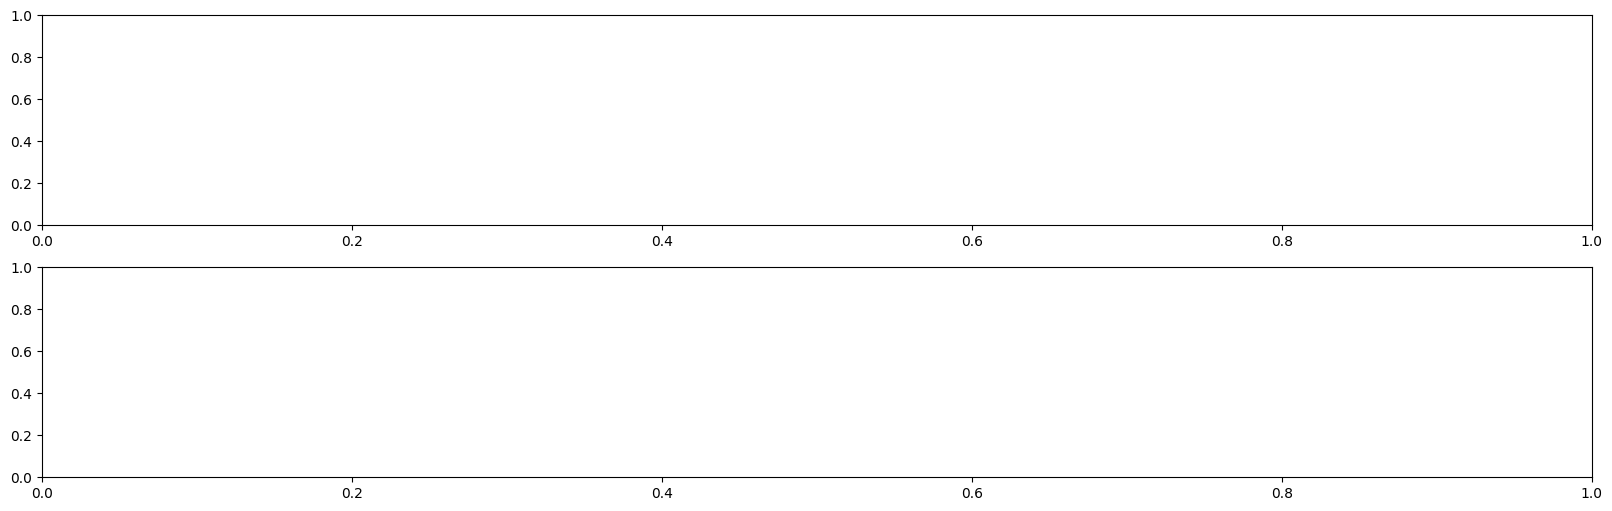

In [ ]:
# Impostare la dimensione del grafico e il layout
fig, axs = plt.subplots(2, 1, figsize=(20, 6))

# Creare il grafico delle vendite mensili
axs[0].plot(monthly_sales["datetime"], monthly_sales["Sales_Amount"])
axs[0].set_title("Sales Amount per Month")
axs[0].set_xlabel("datetime")
axs[0].set_ylabel("Sales Amount")
axs[0].tick_params(axis='x', rotation=45)

# Creare il grafico delle quantità mensili
axs[1].plot(monthly_quantity["datetime"], monthly_quantity["Quantity"], color='orange')
axs[1].set_title("Quantity per Month")
axs[1].set_xlabel("datetime")
axs[1].set_ylabel("Quantity")
axs[1].tick_params(axis='x', rotation=45)

# Migliorare la disposizione
plt.tight_layout()
plt.show()

In [ ]:
# Supponendo che il tuo dataframe si chiami final_df
# Imposta la colonna datetime come indice
final_df_copy = final_df.copy()
final_df_copy.set_index('datetime', inplace=True)

# Aggregare le sales_amount e le quantity per giorno del mese
monthly_day_sales = final_df_copy.groupby(final_df_copy.index.day)["Sales_Amount"].sum().reset_index()
monthly_day_quantity = final_df_copy.groupby(final_df_copy.index.day)["Quantity"].sum().reset_index()

# Rinominare le colonne per chiarezza
monthly_day_sales.columns = ["Day_of_Month", "Sales_Amount"]
monthly_day_quantity.columns = ["Day_of_Month", "Quantity"]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-1eb4794249c6>", line 3, in <cell line: 0>
    final_df_copy = final_df.copy()
                    ^^^^^^^^
NameError: name 'final_df' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context

In [ ]:
# Aggregare le sales_amount e le quantity per giorno della settimana
weekly_sales = final_df_copy.groupby(final_df_copy.index.dayofweek)["Sales_Amount"].sum().reset_index()
weekly_quantity = final_df_copy.groupby(final_df_copy.index.dayofweek)["Quantity"].sum().reset_index()

# Rinominare le colonne per chiarezza
weekly_sales.columns = ["Day_of_Week", "Sales_Amount"]
weekly_quantity.columns = ["Day_of_Week", "Quantity"]

# Sostituire i numeri con i nomi dei giorni della settimana
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_sales["Day_of_Week"] = weekly_sales["Day_of_Week"].apply(lambda x: days[x])
weekly_quantity["Day_of_Week"] = weekly_quantity["Day_of_Week"].apply(lambda x: days[x])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-086404d79cbb>", line 2, in <cell line: 0>
    weekly_sales = final_df_copy.groupby(final_df_copy.index.dayofweek)["Sales_Amount"].sum().reset_index()
                   ^^^^^^^^^^^^^
NameError: name 'final_df_copy' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 1101

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-f60416a0e7c3>", line 5, in <cell line: 0>
    axs[0, 0].bar(monthly_day_sales["Day_of_Month"], monthly_day_sales["Sales_Amount"], color='blue')
                  ^^^^^^^^^^^^^^^^^
NameError: name 'monthly_day_sales' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/ultratb.py", line 110

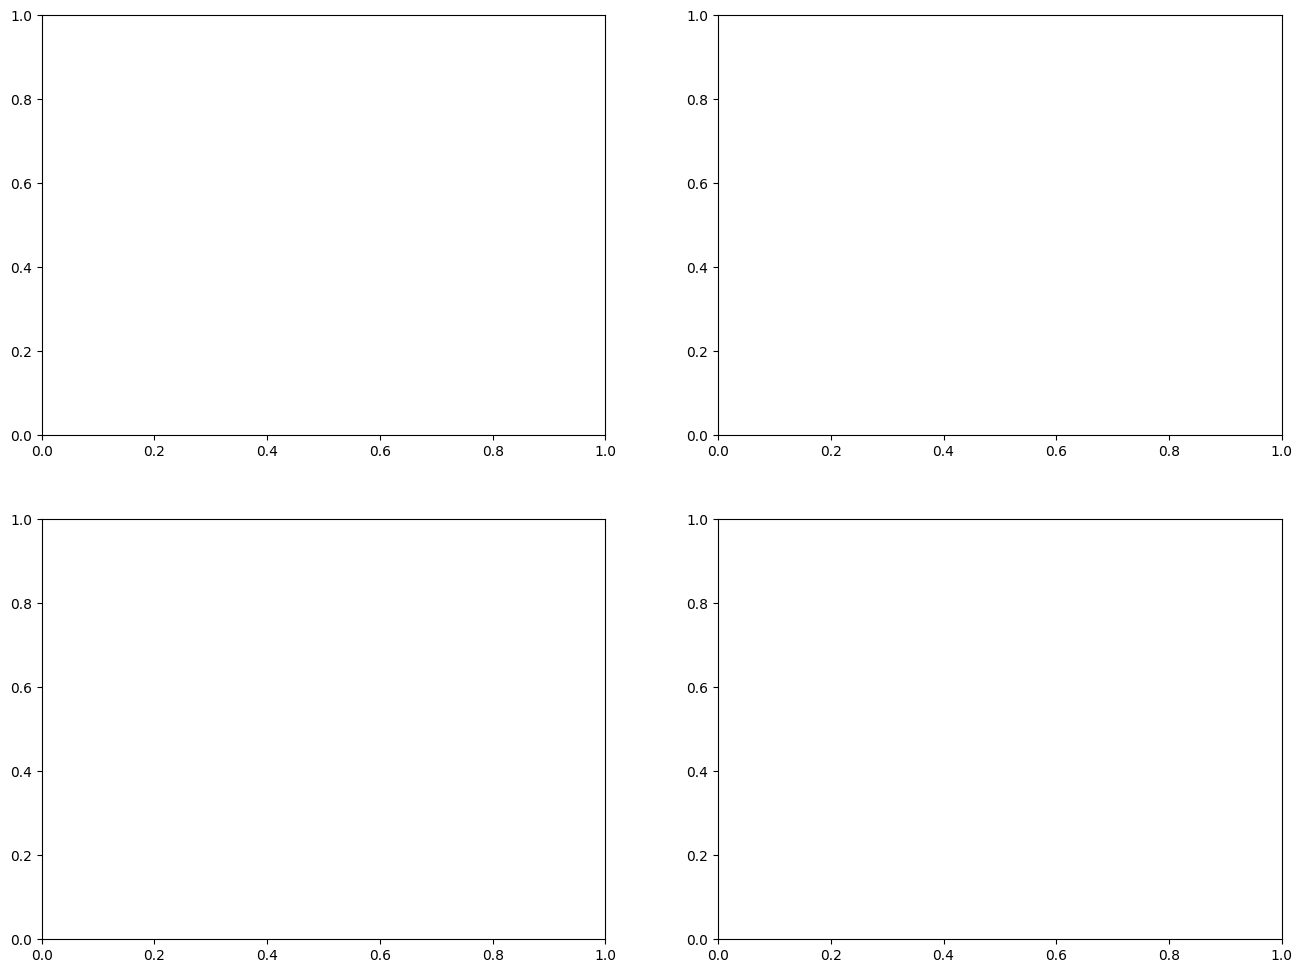

In [ ]:
# Impostare la dimensione del grafico e il layout
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Creare il grafico delle vendite per giorno del mese
axs[0, 0].bar(monthly_day_sales["Day_of_Month"], monthly_day_sales["Sales_Amount"], color='blue')
axs[0, 0].set_title("Sales Amount per Day of Month")
axs[0, 0].set_xlabel("Day of Month")
axs[0, 0].set_ylabel("Sales Amount")

# Creare il grafico delle quantità per giorno del mese
axs[0, 1].bar(monthly_day_quantity["Day_of_Month"], monthly_day_quantity["Quantity"], color='orange')
axs[0, 1].set_title("Quantity per Day of Month")
axs[0, 1].set_xlabel("Day of Month")
axs[0, 1].set_ylabel("Quantity")

# Creare il grafico delle vendite per giorno della settimana
axs[1, 0].bar(weekly_sales["Day_of_Week"], weekly_sales["Sales_Amount"], color='green')
axs[1, 0].set_title("Sales Amount per Day of Week")
axs[1, 0].set_xlabel("Day of Week")
axs[1, 0].set_ylabel("Sales Amount")

# Creare il grafico delle quantità per giorno della settimana
axs[1, 1].bar(weekly_quantity["Day_of_Week"], weekly_quantity["Quantity"], color='red')
axs[1, 1].set_title("Quantity per Day of Week")
axs[1, 1].set_xlabel("Day of Week")
axs[1, 1].set_ylabel("Quantity")

# Migliorare la disposizione
plt.tight_layout()
plt.show()

#### Distribuzione statistica & Boxplot

In [ ]:
final_df['Quantity'].mean()
final_df['Quantity'].std()

In [ ]:
final_df['Sales_Amount'].mean()
final_df['Sales_Amount'].std()

#### Autocorrelazione (ACF) e Partial Autocorrelation (PACF)

### Decomposition delle serie storie

We may have different combinations of trends and seasonality. Depending on the nature of the trends and seasonality, a time series can be modeled as an additive or multiplicative time series. Each observation in the series can be expressed as either a sum or a product of the components.

- Additive time series:
Value = Base Level + Trend + Seasonality + Error

- Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error

Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.

#### Additive time series

Deviazione standard stagionalità (additiva): 1272.4988402620281


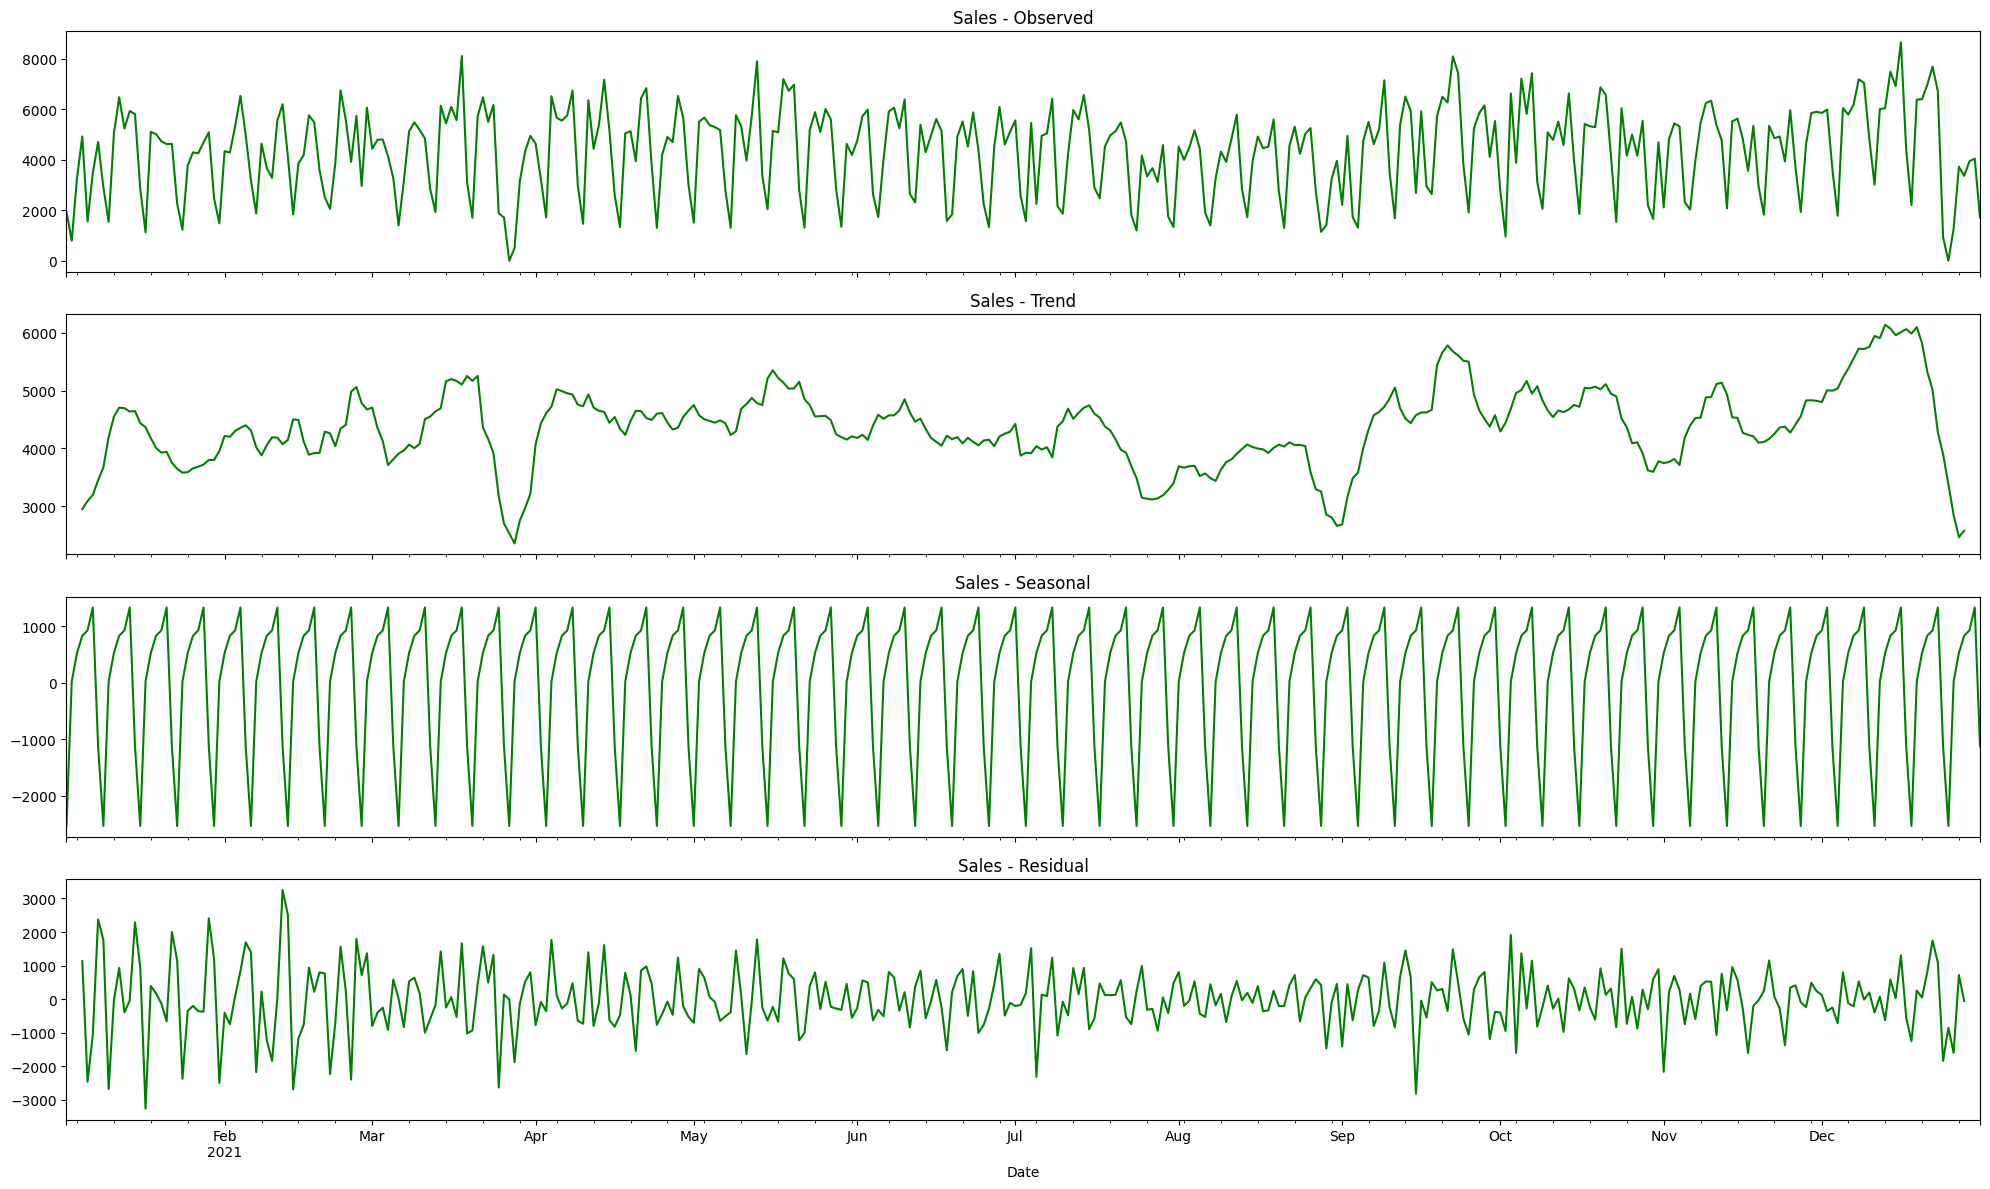

In [ ]:
final_df_copy = final_df.copy()
final_df_copy = final_df_copy[["Sales_Amount", "datetime"]]
final_df_copy.set_index('datetime', inplace=True)

# Aggregare le sales_amount e le quantity per giorno
daily_sales = final_df_copy.resample('D').sum()

# Decomposizione della serie storica delle quantità
result_sales = seasonal_decompose(daily_sales, model='additive')
result_sales_add= result_sales.seasonal
print("Deviazione standard stagionalità (additiva):", result_sales_add.std())

# Migliorare i grafici espandendoli in larghezza
fig, axes = plt.subplots(4, 1, figsize=(20, 12), sharex=True)

# Visualizzare i risultati della decomposizione per le quantità
result_sales.observed.plot(ax=axes[0], title='Sales - Observed', color='green')
result_sales.trend.plot(ax=axes[1], title='Sales - Trend', color='green')
result_sales.seasonal.plot(ax=axes[2], title='Sales - Seasonal', color='green')
result_sales.resid.plot(ax=axes[3], title='Sales - Residual', color='green')

# Impostare etichette per gli assi condivisi
for ax in axes.flat:
    ax.set_xlabel('Date')

# Migliorare la disposizione
plt.tight_layout()
plt.show()

- La serie temporale osservata mostra un'oscillazione regolare, ed è evidente anche una certa ciclicità nelle vendite, suggerendo un pattern stagionale ricorrente.
- Il grafico del trend mostra delle fluttuazioni che potrebbero essere indicatori di fattori esterni che influenzano le vendite in certi periodi dell'anno.
- La componente della stagionalità è molto regolare, indicando che le vendite seguono un pattern ricorrente nel tempo. Il che implica che esistono fattori stagionali prevedibili che influenzano le vendite.
- Il grafico dei residui in ultimo, sembra abbastanza casuale. Se i residui non mostrano schemi evidenti, significa che il modello ha catturato bene trend e stagionalità, altrimenti ci sarebbe bisogno di ulteriori analisi.

Deviazione standard stagionalità (additiva): 139.48053321343772


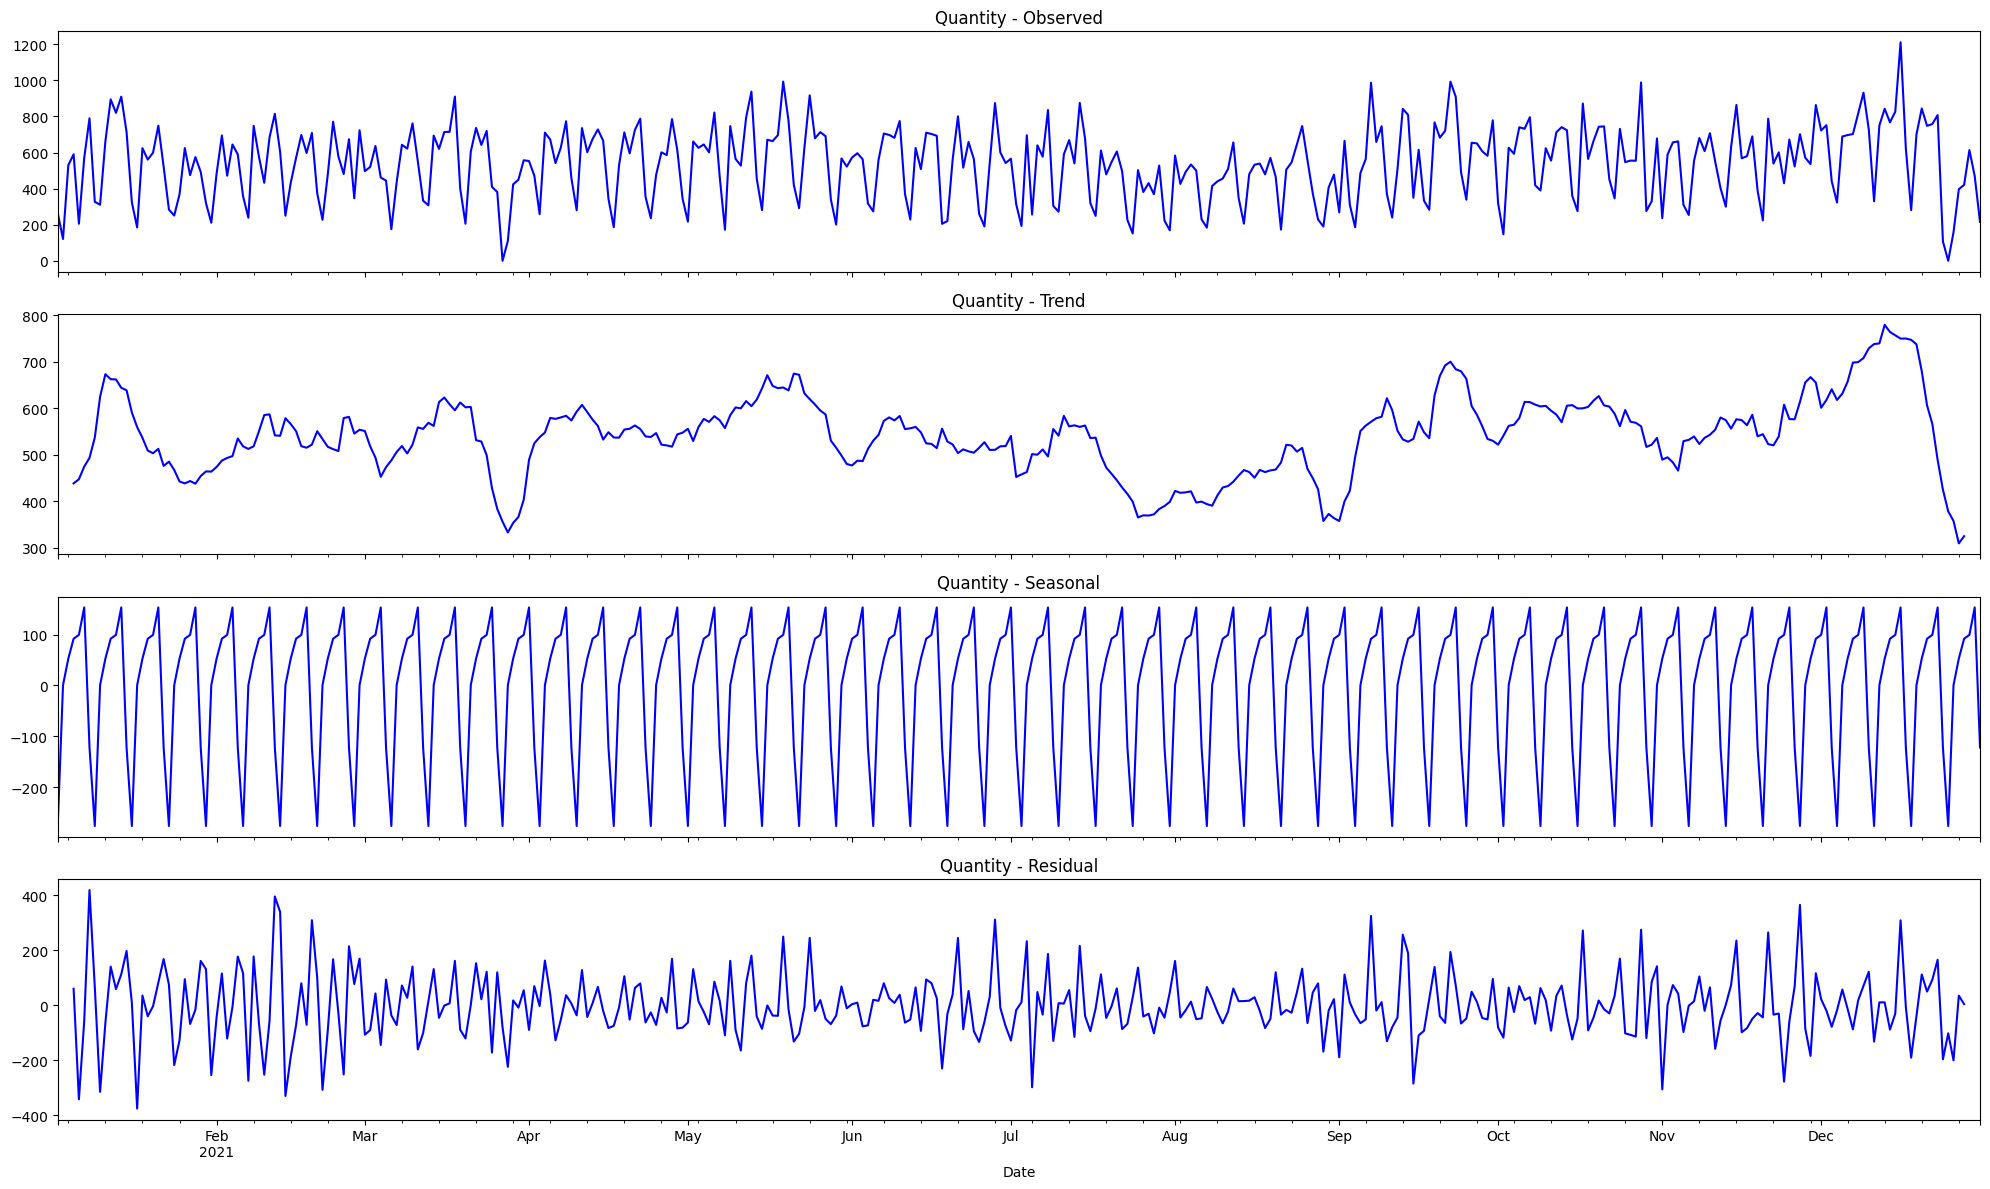

In [ ]:
final_df_copy = final_df.copy()
final_df_copy = final_df_copy[["Quantity", "datetime"]]
final_df_copy.set_index('datetime', inplace=True)

# Aggregare le sales_amount e le quantity per giorno
daily_quantity = final_df_copy.resample('D').sum()

# Decomposizione della serie storica delle quantità
result_quantity = seasonal_decompose(daily_quantity, model='additive')
result_quantity_add= result_quantity.seasonal
print("Deviazione standard stagionalità (additiva):", result_quantity_add.std())

# Migliorare i grafici espandendoli in larghezza
fig, axes = plt.subplots(4, 1, figsize=(20, 12), sharex=True)

# Visualizzare i risultati della decomposizione per le quantità
result_quantity.observed.plot(ax=axes[0], title='Quantity - Observed', color='blue')
result_quantity.trend.plot(ax=axes[1], title='Quantity - Trend', color='blue')
result_quantity.seasonal.plot(ax=axes[2], title='Quantity - Seasonal', color='blue')
result_quantity.resid.plot(ax=axes[3], title='Quantity - Residual', color='blue')

# Impostare etichette per gli assi condivisi
for ax in axes.flat:
    ax.set_xlabel('Date')

# Migliorare la disposizione
plt.tight_layout()
plt.show()

In [ ]:
print("Deviazione standard stagionalità (additiva):", result_quantity.std())

- Il primo grafico mostra la serie temporale originale. Possiamo notare che la quantità di ordini varia significativamente nel tempo, con picchi e flessioni regolari. Sembra esserci quindi una componente stagionale ripetitiva e una certa tendenza sottostante.
- Il secondo grafico invece, (quantity-trend) rappresenta il trend a lungo termine nella serie temporale. Si osservano fasi di crescita e decrescita nel tempo, con alcune flessioni evidenti a metà anno e un calo significativo a dicembre. Il trend suggerisce che il numero di ordini potrebbe avere un andamento ciclico annuale con alcune variazioni.
- Il grafico (quantity-seasonal) evidenza la componente stagionale. Sembra esserci un chiaro schema periodico che si ripete più volte l'anno, il che potrebbe indicare fluttuazioni dovute a giorni della settimana, festività o periodi di alta/bassa domanda. La forma d'onda periodica suggerisce che la domanda segue cicli prevedibili.
- In ultimo (quantity-residual) mostra la parte non spiegata dalla tendenza e dalla stagionalità, ovvero i residui. Se il modello additivo è adeguato, i residui dovrebbero essere distribuiti in modo casuale, senza schemi evidenti. Qui sembra esserci ancora una certa struttura nei residui, il che potrebbe indicare che esistono altri fattori che influenzano la variabile quantità (es. eventi speciali, promozioni, anomalie nei dati).

#### Multiplicative time series

In [ ]:
negative_sales = final_df[final_df['Sales_Amount'] < 0]
print("Valori negativi per Sales_Amount:")
print(negative_sales)

Valori negativi per Sales_Amount:
Empty DataFrame
Columns: [id, Date, Customer_ID, Transaction_ID, SKU_Category, SKU, Quantity, Sales_Amount, GENDER, AGE, GEOGRAPHY, age_group, description, marchio, Women, Men, Girls, Boys, Unisex, category, datetime]
Index: []

[0 rows x 21 columns]


In [ ]:
df_copy = final_df[['datetime', 'Sales_Amount', 'Quantity']].copy()
df_copy.set_index('datetime', inplace=True)
full_date_range = pd.date_range(start=df_copy.index.min(), end=df_copy.index.max(), freq='D')
full_df = pd.DataFrame(index=full_date_range)

# Unire il DataFrame originale con il nuovo DataFrame
merged_df = full_df.join(df_copy)

# Individuare i giorni mancanti
missing_days = merged_df[merged_df['Sales_Amount'].isna()]
print("Giorni mancanti:")
print(missing_days)

# Sostituire i valori mancanti con la media delle vendite
merged_df['Sales_Amount'].fillna(merged_df['Sales_Amount'].mean(), inplace=True)
merged_df['Quantity'].fillna(merged_df['Quantity'].mean(), inplace=True)

# Verificare che i giorni mancanti siano stati aggiunti correttamente
print("DataFrame con giorni mancanti riempiti:")
merged_df.head()

Giorni mancanti:
            Sales_Amount  Quantity
2021-03-27           NaN       NaN
2021-12-25           NaN       NaN
DataFrame con giorni mancanti riempiti:


<ipython-input-317-4c690f1e7e8e>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Sales_Amount'].fillna(merged_df['Sales_Amount'].mean(), inplace=True)
<ipython-input-317-4c690f1e7e8e>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

Sales_Amount  Quantity
2021-01-02          3.13       1.0
2021-01-02          5.46       1.0
2021-01-02          6.35       1.0
2021-01-02          5.59       1.0
2021-01-02          6.88       1.0

Deviazione standard stagionalità (moltiplicativa): 0.2929812378832755


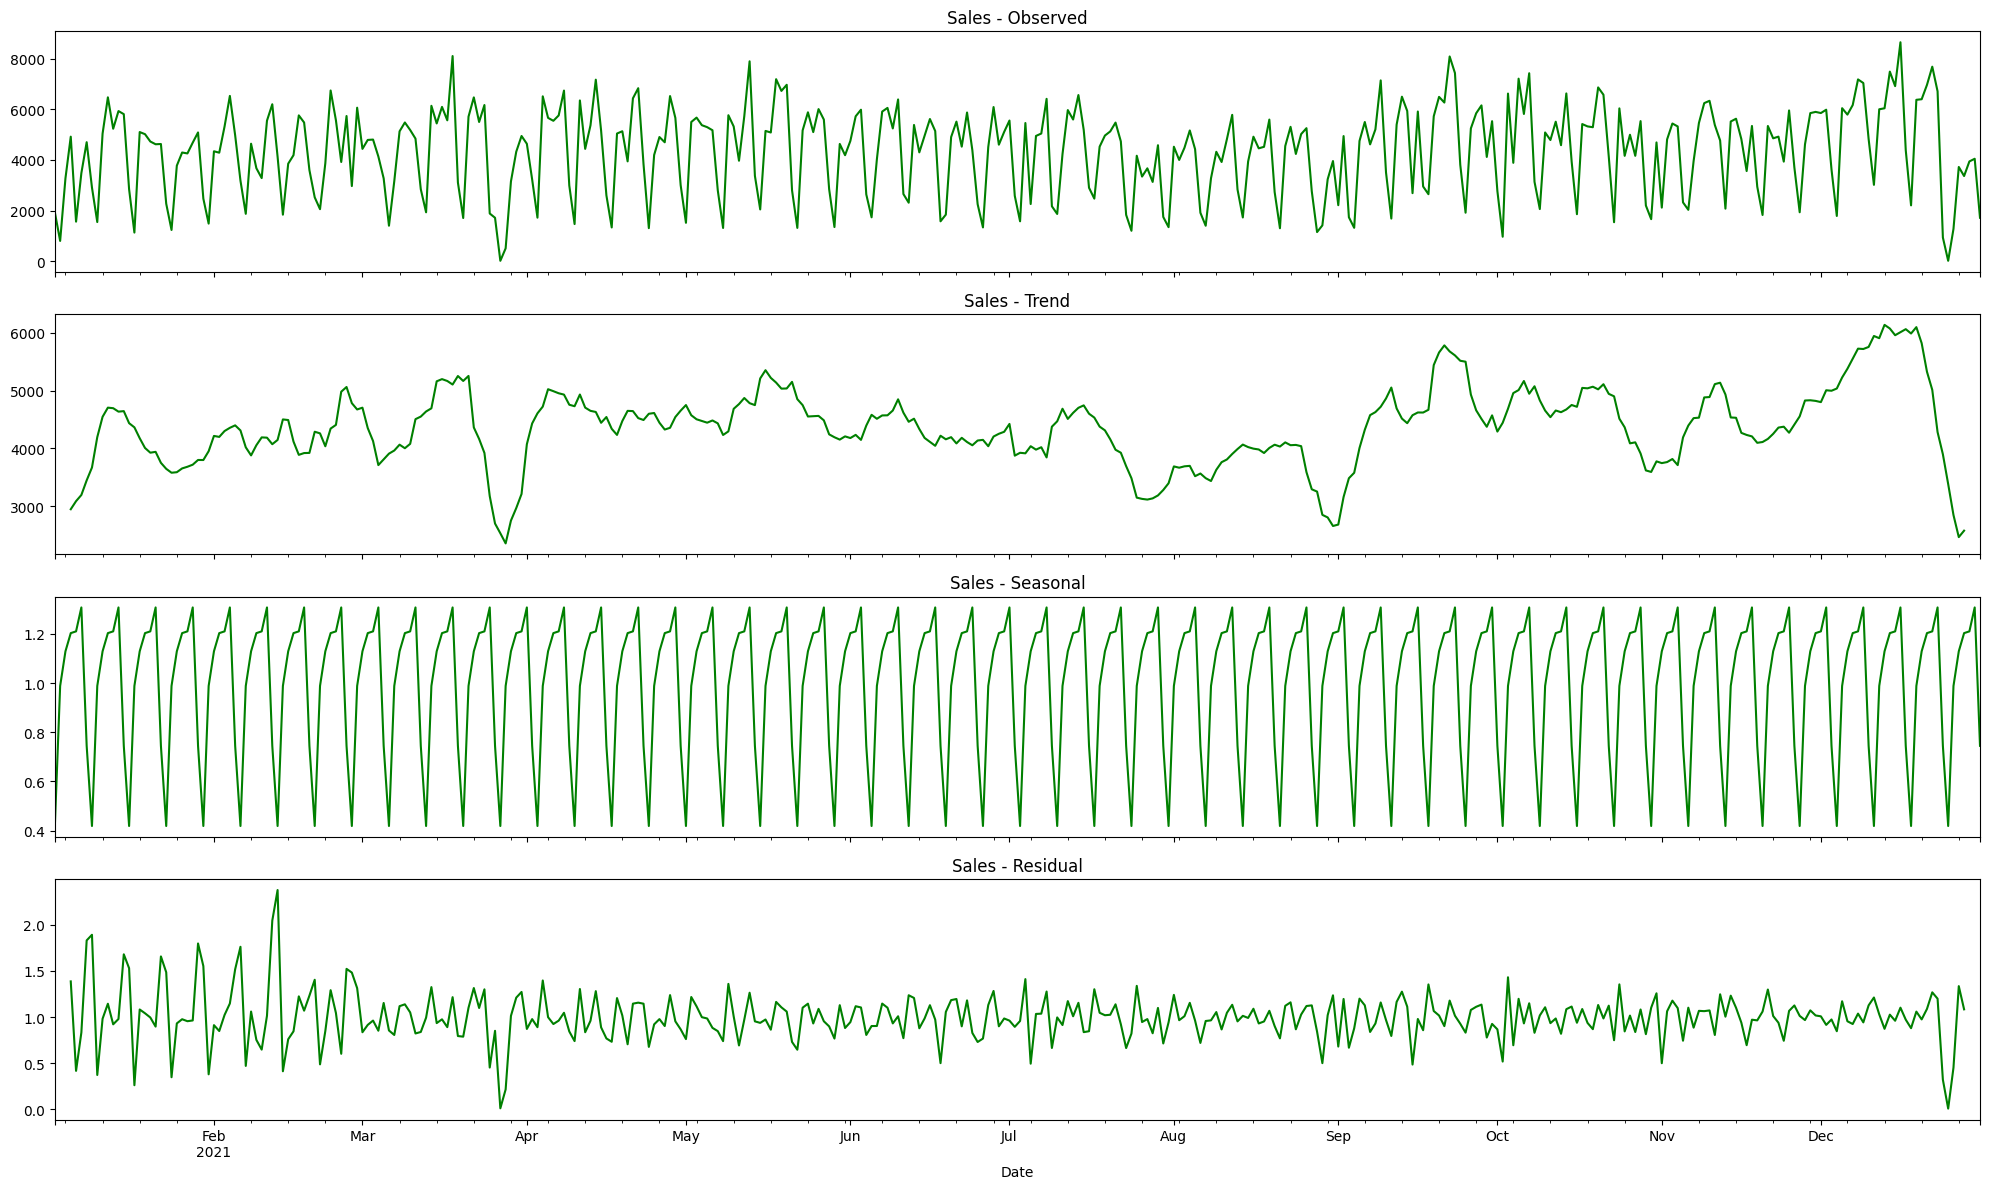

In [ ]:
final_df_copy = merged_df.copy()
final_df_copy = final_df_copy[["Sales_Amount"]]

# Aggregare le sales_amount e le quantity per giorno
daily_sales = final_df_copy.resample('D').sum()

# Decomposizione della serie storica delle quantità
result_sales = seasonal_decompose(daily_sales, model='multiplicative')
result_sales_add= result_sales.seasonal
print("Deviazione standard stagionalità (moltiplicativa):", result_sales_add.std())

# Migliorare i grafici espandendoli in larghezza
fig, axes = plt.subplots(4, 1, figsize=(20, 12), sharex=True)

# Visualizzare i risultati della decomposizione per le quantità
result_sales.observed.plot(ax=axes[0], title='Sales - Observed', color='green')
result_sales.trend.plot(ax=axes[1], title='Sales - Trend', color='green')
result_sales.seasonal.plot(ax=axes[2], title='Sales - Seasonal', color='green')
result_sales.resid.plot(ax=axes[3], title='Sales - Residual', color='green')

# Impostare etichette per gli assi condivisi
for ax in axes.flat:
    ax.set_xlabel('Date')

# Migliorare la disposizione
plt.tight_layout()
plt.show()

Compariamo ora il modello moltiplicativo applicato alle vendite, con il modello additivo precedente.
- La serie osservata mostra andamenti simili al modello additivo, con cicli ricorrenti che suggeriscono la presenza di stagionalità.
- Anche il trend è simile a quello del modello additivo.

Deviazione standard stagionalità (moltiplicativa): 0.26120550760103606


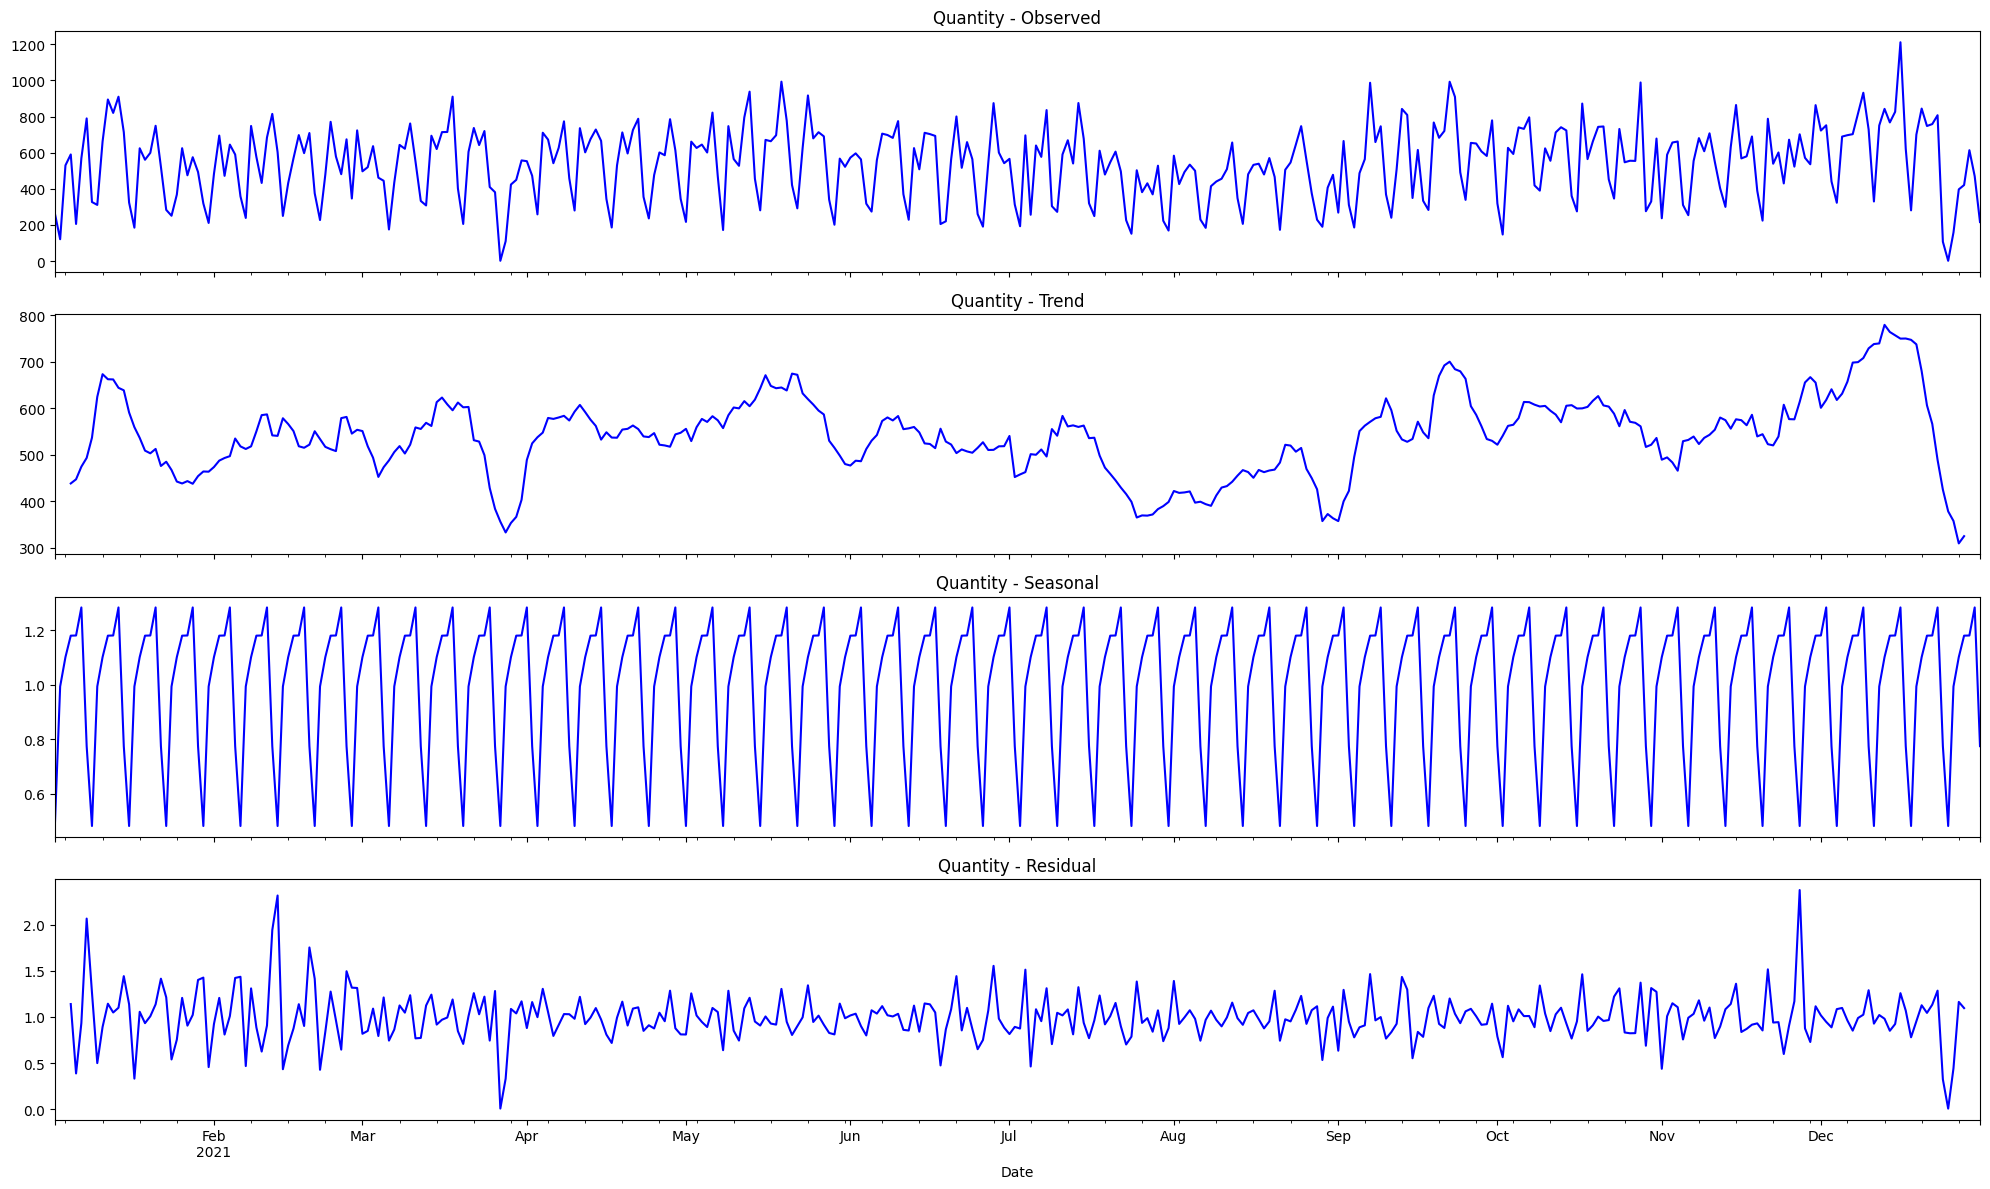

In [ ]:
final_df_copy = merged_df.copy()
final_df_copy = final_df_copy[["Quantity"]]

# Aggregare le sales_amount e le quantity per giorno
daily_quantity = final_df_copy.resample('D').sum()

# Decomposizione della serie storica delle quantità
result_quantity = seasonal_decompose(daily_quantity, model='multiplicative')
result_quantity_add= result_quantity.seasonal
print("Deviazione standard stagionalità (moltiplicativa):", result_quantity_add.std())

# Migliorare i grafici espandendoli in larghezza
fig, axes = plt.subplots(4, 1, figsize=(20, 12), sharex=True)

# Visualizzare i risultati della decomposizione per le quantità
result_quantity.observed.plot(ax=axes[0], title='Quantity - Observed', color='blue')
result_quantity.trend.plot(ax=axes[1], title='Quantity - Trend', color='blue')
result_quantity.seasonal.plot(ax=axes[2], title='Quantity - Seasonal', color='blue')
result_quantity.resid.plot(ax=axes[3], title='Quantity - Residual', color='blue')

# Impostare etichette per gli assi condivisi
for ax in axes.flat:
    ax.set_xlabel('Date')

# Migliorare la disposizione
plt.tight_layout()
plt.show()

Nel modello moltiplicativo, la serie osservata viene decomposta in trend, stagionalità e residui, ma le componenti vengono combinate in modo proporzionale (cioè, la stagionalità e il rumore sono espressi come percentuali rispetto alla grandezza del trend).
- Per quanto riguarda l'andamento della curva nel grafico (Observed), la serie sembra mostrare un comportamento simile a quello visto nel modello additivo.
- anche il trend di lungo periodo è molto simile a quello del modello additivo, ma qui la variabilità della stagionalità aumenta quando il trend cresce, ciò significa che la stagionalità non è costante nel tempo e che quindi il modello moltiplicativo potrebbe essere più appropriato.
- Il grafico delle stagionalità mostra un comportamento invece non costante in ampiezza e che varia in funzione del trend.
- I residui sembrano abbastanza casuali, ma potrebbero esserci ancora alcuni schemi non spiegati completamente.

### Previsione

### Regressione Lineare

## Clustering

link1: https://www.kaggle.com/code/jaimebecerraguerrero/sales-cluster-analysis

link2: https://www.kaggle.com/code/anubhavgoyal10/store-sales-eda-clustering